# 52954 - Machine Learning and Statistics - Project

## Mark Kelly - 2019

This assessment concerns the Boston House Prices dataset and is broken up into 3 main sections:
- Describe
- Infer
- Predict

__Describe__: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset. This part is worth 20% of your overall mark.

__Infer__: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your ﬁndings within the notebook.

__Predict__: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

## Section 1 - Describe

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.weightstats as ws

In [231]:
from sklearn.datasets import load_boston
df_boston = load_boston()
import matplotlib.pyplot as plt

In [232]:
import keras as kr

In [233]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

import sklearn.decomposition as dec

In [234]:
plt.rcParams["figure.figsize"] = (15,9)

In [235]:
type(df_boston)

sklearn.utils.Bunch

In [236]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [237]:
df = pd.DataFrame(data=df_boston['data'], columns=df_boston['feature_names'])

In [238]:
df['MEDV'] = df_boston.target

***

For this project, the inbuilt Boston dataset from sklearn is used. The dataset is loaded into a dataframe, df.
Using the describe fucntion with a transform to make reading easier, we can see that there are 506 values in each column of the dataset. Min, mean, max and other values are generated. 

In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


To get a better understand of what is going on with this dataset, a distribution plot has been generated for each column of data using the seaborn.distplot function. 

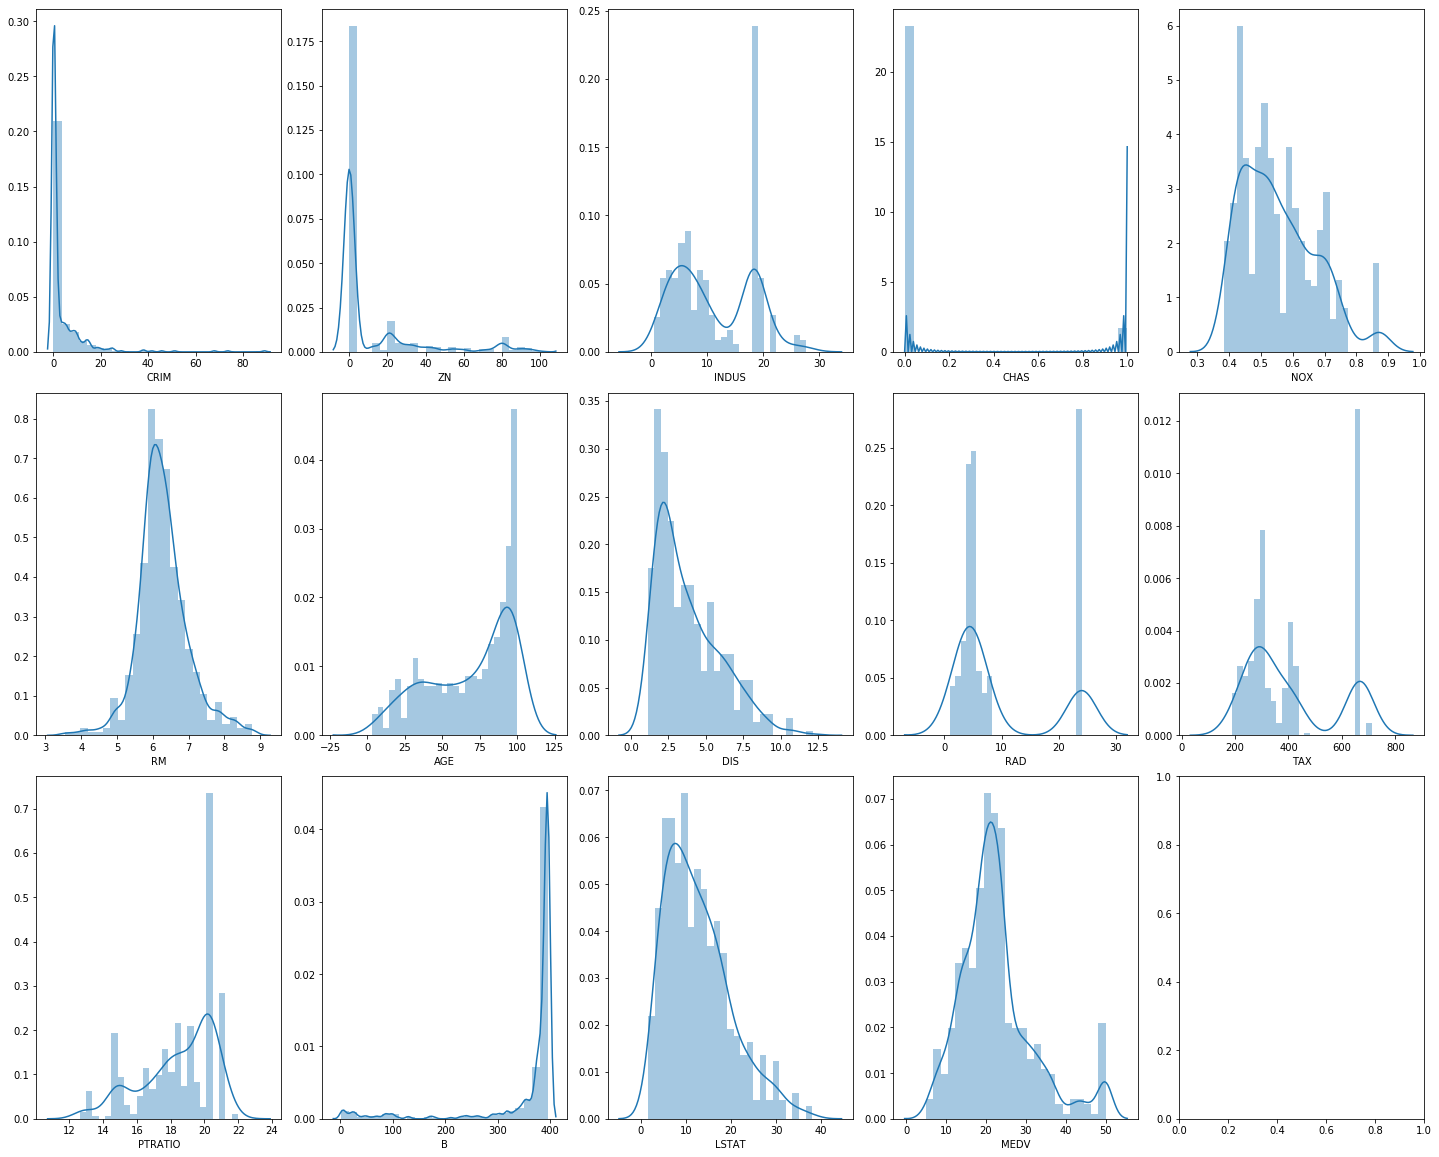

In [240]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.distplot(df['CRIM'], bins=25, ax=axs[0, 0])
sns.distplot(df['ZN'], bins=25, ax=axs[0, 1])
sns.distplot(df['INDUS'], bins=25, ax=axs[0, 2])
sns.distplot(df['CHAS'], bins=25, ax=axs[0, 3])
sns.distplot(df['NOX'], bins=25, ax=axs[0, 4])
sns.distplot(df['RM'], bins=25, ax=axs[1, 0])
sns.distplot(df['AGE'], bins=25, ax=axs[1, 1])
sns.distplot(df['DIS'], bins=25, ax=axs[1, 2])
sns.distplot(df['RAD'], bins=25, ax=axs[1, 3])
sns.distplot(df['TAX'], bins=25, ax=axs[1, 4])
sns.distplot(df['PTRATIO'], bins=25, ax=axs[2, 0])
sns.distplot(df['B'], bins=25, ax=axs[2, 1])
sns.distplot(df['LSTAT'], bins=25, ax=axs[2, 2])
sns.distplot(df['MEDV'], bins=25, ax=axs[2, 3])
plt.show()

From this we can see the distribution for each data column. We can see that the RM values are in a Gaussian Normal distribution. The values for CHAS are binomial with values of either 0 or 1. The distributions for DIS, LSTAT and NOX seem to follow the lognormal distribution. It's also worth noting that the values for RAD are generally centered around 10 in an almost Gaussian distribution except for a large spike around 24. It is quite similar to the TAX distibution.

Another option is to generate boxplots for each variable. This can be useful to sometimes identify other traits of the data.

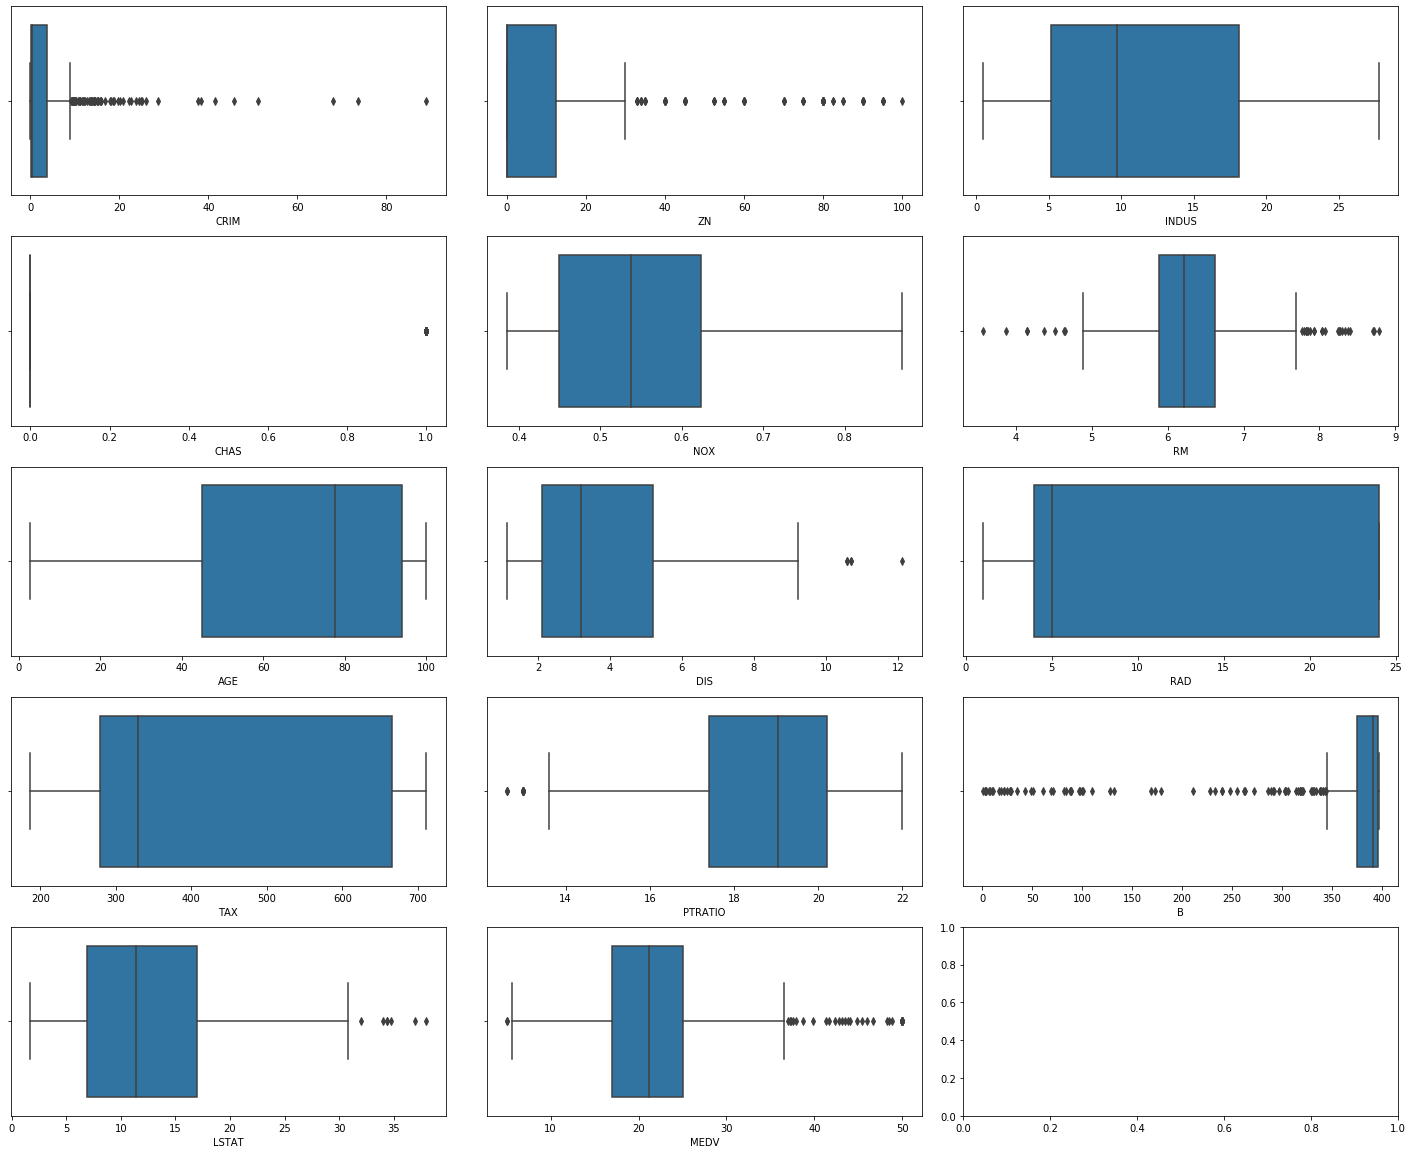

In [241]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.boxplot(x=df['CRIM'], ax=axs[0, 0])
sns.boxplot(x=df['ZN'], ax=axs[0, 1])
sns.boxplot(x=df['INDUS'], ax=axs[0, 2])
sns.boxplot(x=df['CHAS'], ax=axs[1, 0])
sns.boxplot(x=df['NOX'], ax=axs[1, 1])
sns.boxplot(x=df['RM'], ax=axs[1, 2])
sns.boxplot(x=df['AGE'], ax=axs[2, 0])
sns.boxplot(x=df['DIS'], ax=axs[2, 1])
sns.boxplot(x=df['RAD'], ax=axs[2, 2])
sns.boxplot(x=df['TAX'], ax=axs[3, 0])
sns.boxplot(x=df['PTRATIO'], ax=axs[3, 1])
sns.boxplot(x=df['B'], ax=axs[3, 2])
sns.boxplot(x=df['LSTAT'], ax=axs[4, 0])
sns.boxplot(x=df['MEDV'], ax=axs[4, 1])
plt.show()

From this, it can be observed that the values of NOX are all between 0 and 1, with no values outside the 'minimum' or 'maximum' values of the boxplot. For the variable B, there are numerous outliers lower than the value 'minimum' boxplot values. The boxplots are very useful for understanding the median values of each variable.

Another attribute of the datat that might be useful to investigate would be the covariance and correlation of the variables. 
Covariance shows how variables differ from each other (higher this value the more dependent is the relationship) while correlation shows the relationship between them on a scale between -1 and 1 (values close to 1 and -1 indicate either a strong positive or negative relationship). 

In [242]:
df.cov().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,73.987,-40.216,23.992,-0.122,0.420,-1.325,85.405,-6.877,46.848,844.822,5.399,-302.382,27.986,-30.719
ZN,-40.216,543.937,-85.413,-0.253,-1.396,5.113,-373.902,32.629,-63.349,-1236.454,-19.777,373.721,-68.783,77.315
INDUS,23.992,-85.413,47.064,0.110,0.607,-1.888,124.514,-10.228,35.550,833.360,5.692,-223.580,29.580,-30.521
CHAS,-0.122,-0.253,0.110,0.065,0.003,0.016,0.619,-0.053,-0.016,-1.523,-0.067,1.131,-0.098,0.409
NOX,0.420,-1.396,0.607,0.003,0.013,-0.025,2.386,-0.188,0.617,13.046,0.047,-4.021,0.489,-0.455
RM,-1.325,5.113,-1.888,0.016,-0.025,0.494,-4.752,0.304,-1.284,-34.583,-0.541,8.215,-3.080,4.493
AGE,85.405,-373.902,124.514,0.619,2.386,-4.752,792.358,-44.329,111.771,2402.690,15.937,-702.940,121.078,-97.589
DIS,-6.877,32.629,-10.228,-0.053,-0.188,0.304,-44.329,4.434,-9.068,-189.665,-1.060,56.040,-7.473,4.840
RAD,46.848,-63.349,35.550,-0.016,0.617,-1.284,111.771,-9.068,75.816,1335.757,8.761,-353.276,30.385,-30.561
TAX,844.822,-1236.454,833.360,-1.523,13.046,-34.583,2402.690,-189.665,1335.757,28404.759,168.153,-6797.911,654.715,-726.256


In [243]:
df.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


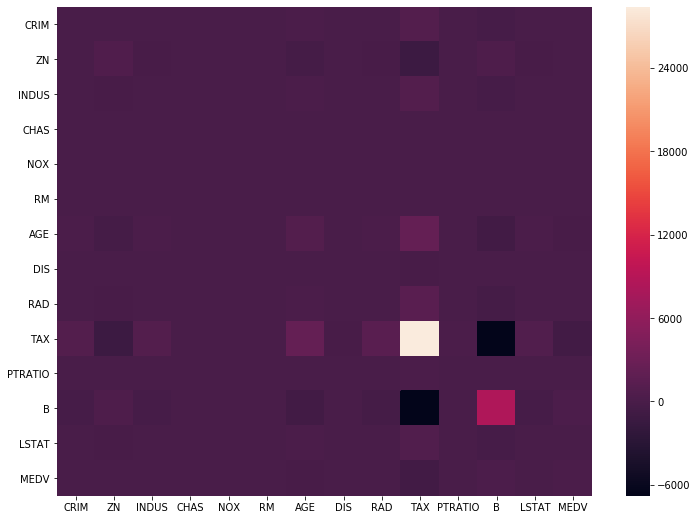

In [244]:
plt.subplots(figsize=(12,9))
covariance_matrix = df.cov().round(20)
sns.heatmap(data=covariance_matrix, annot=False)

Because of the scale and size of the results of the covariance it is very hard to really tell anything from this plot. 

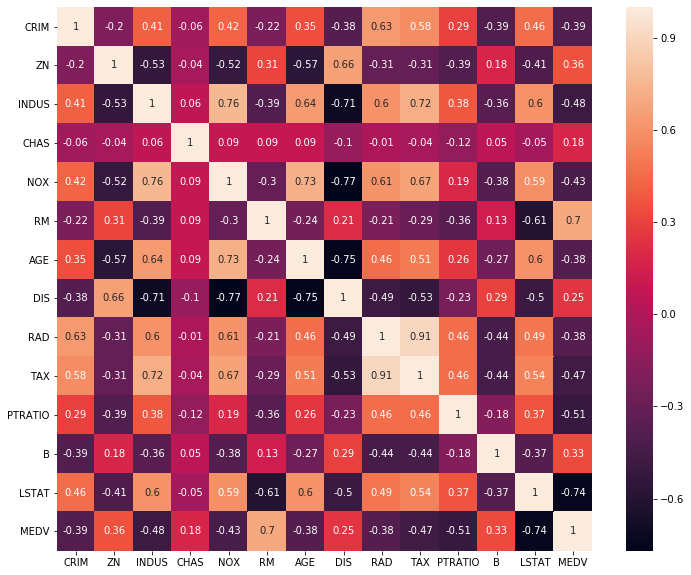

In [245]:
# Adapted from [1]
plt.subplots(figsize=(12,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Very light or very dark squares indicate the variables with the highest (either positive or negative) correlation. Some variable pairing that might be worth a closer inspection are LSAT/MEDV, DIS/AGE, TAX/RAD, NOX/INDUS, RM/MEDV

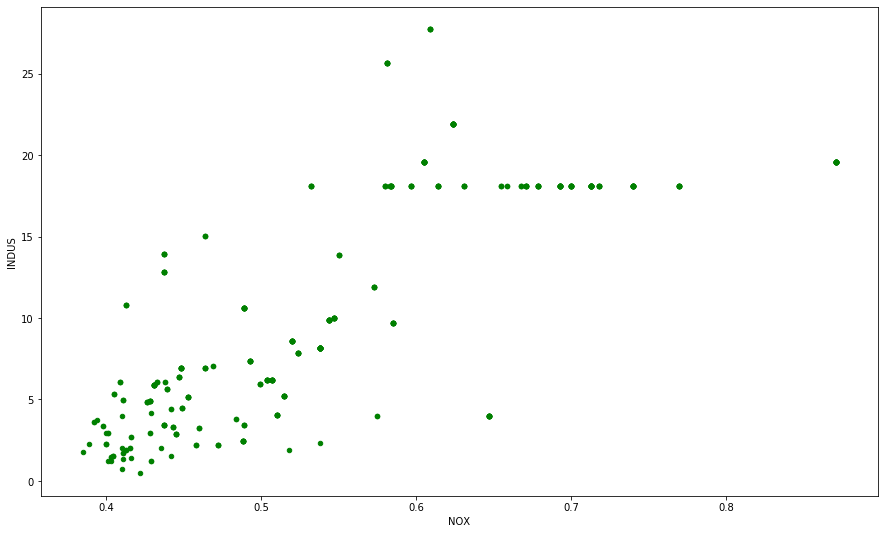

In [246]:
df.plot(kind='scatter',x='NOX',y='INDUS', color="green")
plt.show()

The scatter plot for these variables indicate that there is a clear relationship between NOX and INDUS. As the % of Industrial units increase so does the level of NOX. 

Looking at the correlations matrix results for TAX and RAD, we see a value of 0.91 returned. This would indicate a high correlation between the two variables. However when we look at a scatter plot between them we see that there are a couple of outlier values that skew the correlation results. Looking at the plot it is hard to see any real correlation between them. This example is useful to remind ourselves not to look at single aspects of analysis and jumping to conclusions.

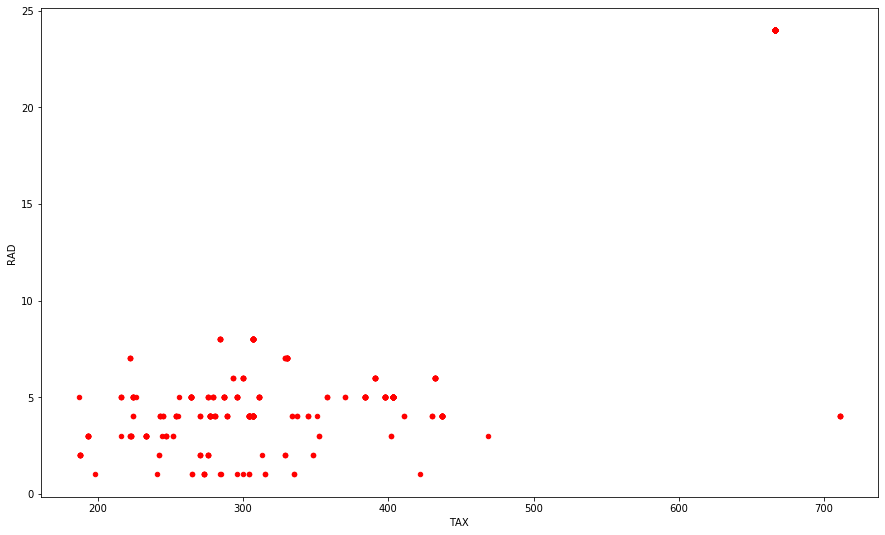

In [247]:
df.plot(kind='scatter',x='TAX',y='RAD', color="red")
plt.show()

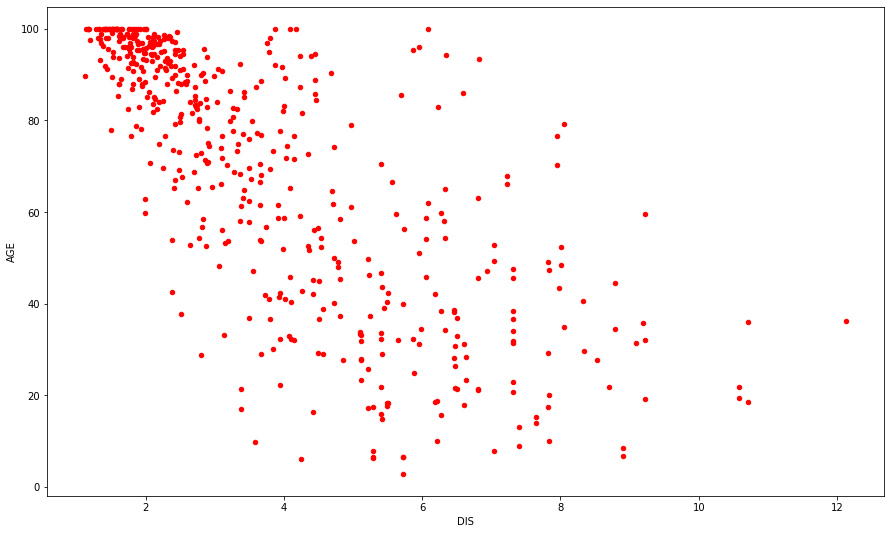

In [248]:
df.plot(kind='scatter',x='DIS',y='AGE',color='red')
plt.show()

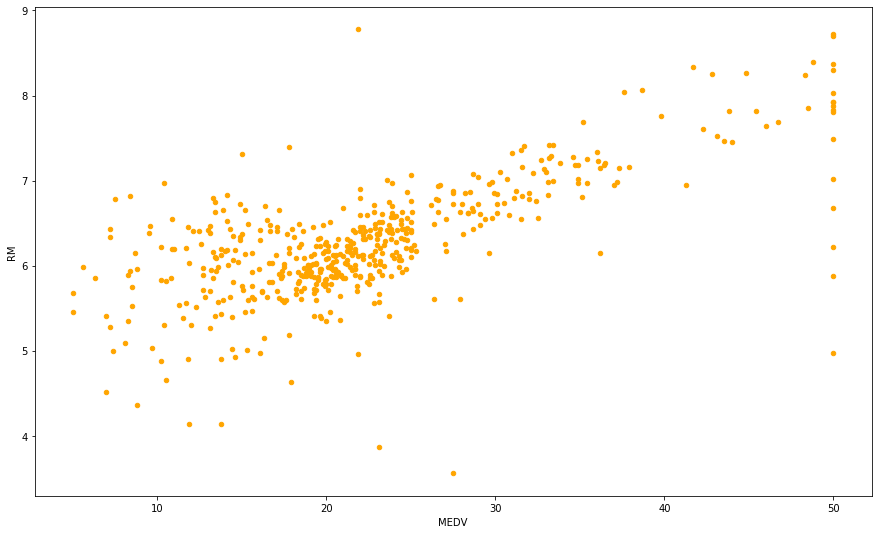

In [249]:
df.plot(kind='scatter',x='MEDV',y='RM',color='orange')
plt.show()

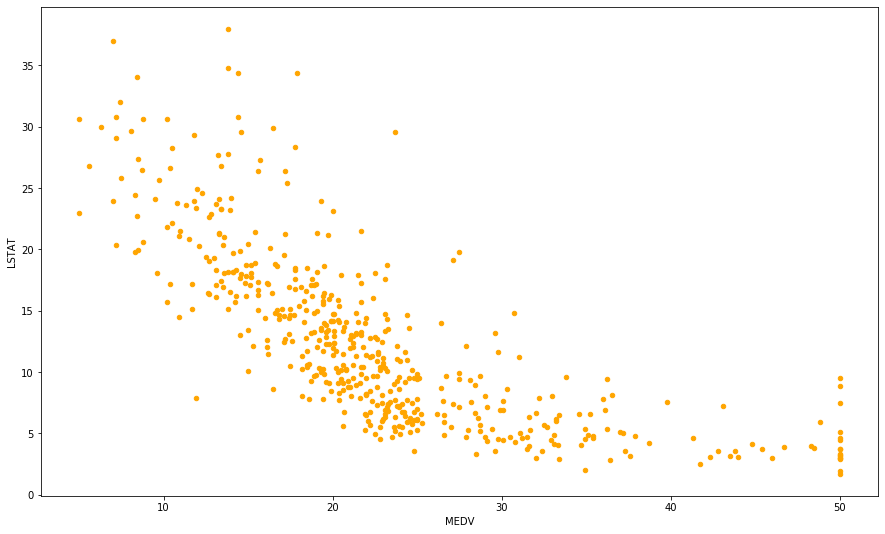

In [250]:
df.plot(kind='scatter',x='MEDV',y='LSTAT',color='orange')
plt.show()

This plot is interesting in that it looks like there is a clear pattern between these two variables. As LSTAT decreases, MEDV increases. A polynominal function could be used to model this pattern.

In [251]:
np.polyfit(df['MEDV'], df['LSTAT'], 1)

array([-0.57275582, 25.55885923])

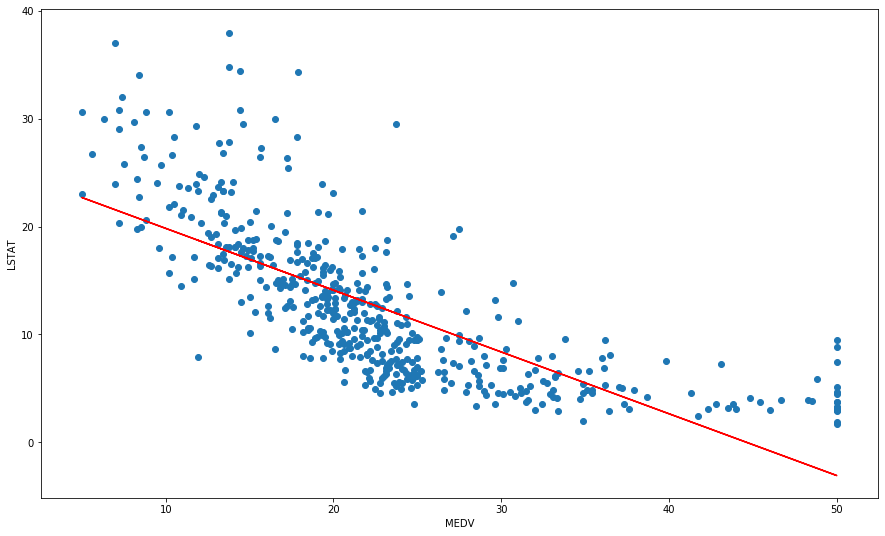

In [252]:
plt.plot(df['MEDV'], df['MEDV'] * -0.5727 + 25.55885, 'r-')
plt.scatter(df['MEDV'], df['LSTAT'])
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.show()

Although the line follows the general shape of the variables, the values for LSTAT bottom out around 3 and do not seem to go any lower however the polynominal line would dip below 0 and continue so it is not the most suitable representation of these variables. 

***
## Section 2 - Inferential

A ttest is a type of inferential statistics test used to determine if there is a significant different between the means of two groups of data which may be related in certain features.

For this experiment I want to see the ttest statistics and pvalues for each variable in the dataset run against the all of the others. From the initial analysis we can see there is no correlation between a lot of the variables but I still think it will be interesting to see this plotted.

In [253]:
df_results = pd.DataFrame(columns=['Var1', 'Var2','ttest Statistic','ttest Pvalue'])
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue


In [254]:
#defining empty lists that will store the results of the ttest loop
v1 = []
v2 = []
S = []
P = []

In [255]:
# Creating a for loop that will run a tt for each variable against each other variable.
for column in df:
    for column1 in df:
        result = ss.ttest_ind(df[column], df[column1])
        #print(column, column1, result.statistic, result.pvalue)
        v1.append(column)
        v2.append(column1)
        S.append(result.statistic)
        P.append(result.pvalue)

In [256]:
df_results['Var1'] = v1
df_results['Var2'] = v2
df_results['ttest Statistic'] = S
df_results['ttest Pvalue'] = P
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue
0,CRIM,CRIM,0.000000,1.000000e+00
1,CRIM,ZN,-7.013196,4.259687e-12
2,CRIM,INDUS,-15.381434,3.988806e-48
3,CRIM,CHAS,9.265024,1.141922e-19
4,CRIM,NOX,7.998610,3.430040e-15
5,CRIM,RM,-6.962202,6.024193e-12
6,CRIM,AGE,-49.646090,3.097115e-273
7,CRIM,DIS,-0.461087,6.448357e-01
8,CRIM,RAD,-10.909390,2.842063e-26
9,CRIM,TAX,-53.934427,1.251318e-299


In [257]:
# Removing the rows where the ttest was conducted on the same set of values eg ss.ttest_ind(CRIM, CRIM)
df_results = df_results.drop([0,15,30,45,60,75,90,105,120,135,150,165,180,195], axis=0)

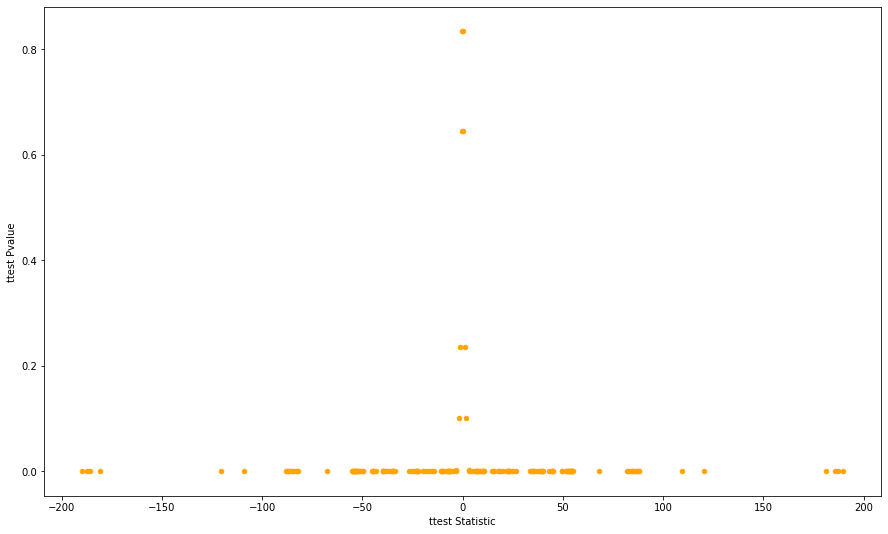

In [258]:
df_results.plot(kind='scatter',x='ttest Statistic',y='ttest Pvalue',color='orange')
plt.show()

Looking at this scatter plot, it looks like there are only 2 pairs of variables with a ttest pvalue above 0.5%, that might be significant. First we'll sort the data to find the tests where the P value is greater than 0.5%.

In [259]:
df_results.sort_values(by='ttest Pvalue', ascending=False).head(10)

,Var1,Var2,ttest Statistic,ttest Pvalue
29,INDUS,ZN,-0.209911,0.833780
16,ZN,INDUS,0.209911,0.833780
98,DIS,CRIM,0.461087,0.644836
7,CRIM,DIS,-0.461087,0.644836
169,LSTAT,ZN,1.189155,0.234658
26,ZN,LSTAT,-1.189155,0.234658
113,RAD,ZN,-1.639298,0.101463
22,ZN,RAD,1.639298,0.101463
36,INDUS,RAD,3.221156,0.001318
114,RAD,INDUS,-3.221156,0.001318


INDUS / ZN and DIS / CRIM are the two pairs of variables that indicate there is a relationship between them, based on the ttest results. We can plot these on a scatter plot to give us a different view to what is going on here.

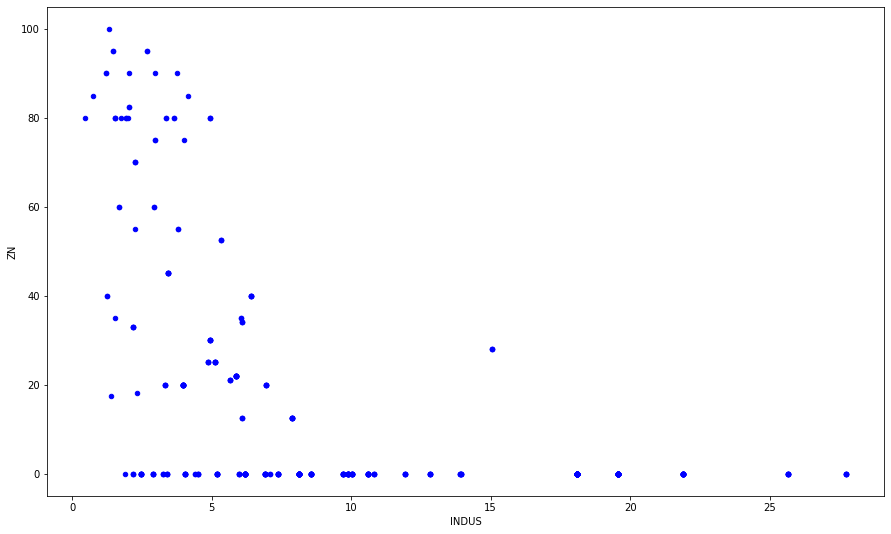

In [260]:
df.plot(kind='scatter',x='INDUS',y='ZN',color='blue')
plt.show()

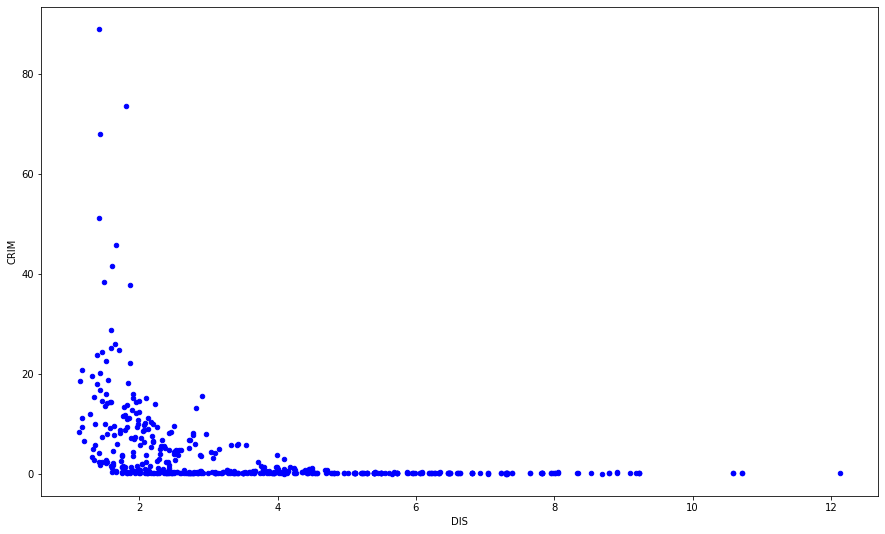

In [261]:
df.plot(kind='scatter',x='DIS',y='CRIM',color='blue')
plt.show()

From this, we could infer that as the proportion of non retail business per town (INDUS) increases the proportion of residential land zones (ZN) decreased. Similarly, as the distance to one of the Boston Employment Centre (DIS) increases, the per capaita crime rate decreases.

To look at the specific case of whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t, we can look at the ttest results for these two variables.

In [262]:
ss.ttest_ind(df['CHAS'], df['MEDV'])

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

From this result we would accept the null hypothesis and conclude that there is no significant relationship between these variables.

However it could also be useful to see these two variables in a scatter plot. (For the CHAS variable, 1 indicates that the house is along the Charles river while 0 means it is not)

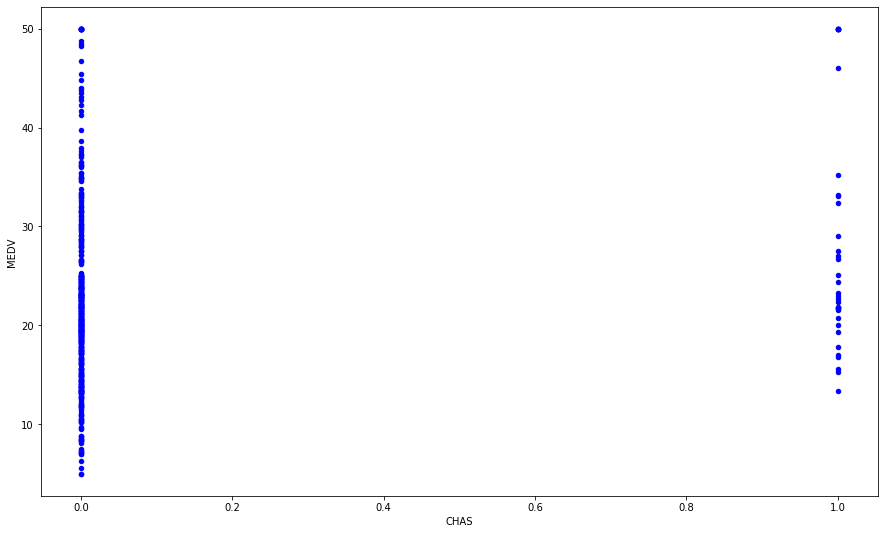

In [263]:
df.plot(kind='scatter',x='CHAS',y='MEDV',color='blue')
plt.show()

Looking at the scatter plot, it looks like the MEDV is pretty evenly distributed for both sets of values of CHAS. There are more houses in the lowest MEDV values when CHAS is 0 but if you were to pick any value of MEDV, it would not be possible to conclude if CHAS was 0 or 1.

In [264]:
# creating 2 dataframes based on the values of the CHAS variable
df_chas_0 = df[df['CHAS'] == 0]
df_chas_1 = df[df['CHAS'] == 1]

In [265]:
# Getting the mean values for all values in both new dataframes.
print (df_chas_0.mean())

CRIM         3.744447
ZN          11.634820
INDUS       11.019193
CHAS         0.000000
NOX          0.551817
RM           6.267174
AGE         67.911677
DIS          3.851915
RAD          9.566879
TAX        409.870488
PTRATIO     18.527176
B          355.461040
LSTAT       12.757941
MEDV        22.093843
dtype: float64


In [266]:
print (df_chas_1.mean())

CRIM         1.851670
ZN           7.714286
INDUS       12.719143
CHAS         1.000000
NOX          0.593426
RM           6.519600
AGE         77.500000
DIS          3.029709
RAD          9.314286
TAX        386.257143
PTRATIO     17.491429
B          372.997429
LSTAT       11.241714
MEDV        28.440000
dtype: float64


With these we can see that the average house price located along the Charles river is 28.4 (28,400 dollars) compared with 22.1 (22,100 dollars) for those not along the river.

The conclusion I would come to based on the information available is that although the average house prices are slightly higher located along the Charles river is no major correlation between MEDV and CHAS.

## Section 3 - Predict

To predict the house price we will first select what variables will be used. All variables could be used but if there is no relationship them and the MEDV variable, it may not be necessary. The results of the ttests can be looked at, specifically for MEDV. We will first look at them and sort ascending according to ttest Pvalue.

In [267]:
medv_results = df_results.loc[df_results['Var1'] == 'MEDV']

In [268]:
medv_results.sort_values(by='ttest Pvalue', ascending=False)

,Var1,Var2,ttest Statistic,ttest Pvalue
192,MEDV,PTRATIO,9.706960,2.332590e-21
183,MEDV,ZN,10.021561,1.337148e-22
194,MEDV,LSTAT,19.086255,1.381320e-69
184,MEDV,INDUS,22.341709,3.640811e-90
190,MEDV,RAD,23.059894,7.311700e-95
182,MEDV,CRIM,33.795968,4.137606e-168
188,MEDV,AGE,-34.973905,3.209462e-176
187,MEDV,RM,39.624611,6.490168e-208
189,MEDV,DIS,44.673237,2.033628e-241
191,MEDV,TAX,-51.403010,3.613063e-284


From this, it can be observed that although none of the variable have a ttest value above 5%, the top 5 variables that might indicate some relationship with MEDV are PTRATIO, ZN, LSTAT, INDUS and RAD. These 5 will be selected to try and predict the value of MEDV.

RM will also be added to the inputs as it could be observed from the scatter plot against MEDV there appears to be relationship between these. 

First the inputs and outputs will be declared.

In [269]:
inputs = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'RM']]
inputsall = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'CRIM', 'AGE', 'RM', 'DIS', 'TAX', 'NOX', 'CHAS', 'B']]

In [270]:
outputs = df[['MEDV']]

In [271]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 6.
model.add(kr.layers.Dense(64, input_dim=6, activation='relu'))
model.add(kr.layers.Dense(10, activation="softplus"))
model.add(kr.layers.Dense(10, activation="relu"))
model.add(kr.layers.Dense(1, activation="softplus"))

# Build the graph./ Try loss mean_squared_error as well.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae'])

In [272]:
# Train the neural network.
history = model.fit(inputs, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 249us/step - loss: 621.5475 - accuracy: 0.0000e+00 - mae: 23.1640 - val_loss: 238.7918 - val_accuracy: 0.0000e+00 - val_mae: 14.5291
Epoch 2/1000
404/404 [==============================] - 0s 35us/step - loss: 511.2098 - accuracy: 0.0000e+00 - mae: 20.6776 - val_loss: 182.6645 - val_accuracy: 0.0000e+00 - val_mae: 12.3614
Epoch 3/1000
404/404 [==============================] - 0s 34us/step - loss: 374.9522 - accuracy: 0.0000e+00 - mae: 16.8313 - val_loss: 81.3966 - val_accuracy: 0.0000e+00 - val_mae: 7.4351
Epoch 4/1000
404/404 [==============================] - 0s 32us/step - loss: 237.4715 - accuracy: 0.0025 - mae: 12.5535 - val_loss: 58.7590 - val_accuracy: 0.0098 - val_mae: 6.4962
Epoch 5/1000
404/404 [==============================] - 0s 32us/step - loss: 165.2688 - accuracy: 0.0074 - mae: 9.8171 - val_loss: 169.5697 - val_accuracy: 0.0000e+00 - val_mae: 11.5028
Epoch 6/1000
40

Epoch 46/1000
404/404 [==============================] - 0s 39us/step - loss: 22.6023 - accuracy: 0.0099 - mae: 3.4848 - val_loss: 25.8819 - val_accuracy: 0.0196 - val_mae: 3.7999
Epoch 47/1000
404/404 [==============================] - 0s 32us/step - loss: 21.9287 - accuracy: 0.0074 - mae: 3.4360 - val_loss: 25.0875 - val_accuracy: 0.0098 - val_mae: 3.7294
Epoch 48/1000
404/404 [==============================] - 0s 35us/step - loss: 21.5172 - accuracy: 0.0050 - mae: 3.4252 - val_loss: 24.2603 - val_accuracy: 0.0098 - val_mae: 3.6645
Epoch 49/1000
404/404 [==============================] - 0s 35us/step - loss: 20.9513 - accuracy: 0.0050 - mae: 3.3838 - val_loss: 24.0253 - val_accuracy: 0.0196 - val_mae: 3.6328
Epoch 50/1000
404/404 [==============================] - 0s 32us/step - loss: 20.2146 - accuracy: 0.0149 - mae: 3.3110 - val_loss: 23.4232 - val_accuracy: 0.0098 - val_mae: 3.6070
Epoch 51/1000
404/404 [==============================] - 0s 32us/step - loss: 20.8051 - accuracy: 0.

404/404 [==============================] - 0s 32us/step - loss: 13.9920 - accuracy: 0.0248 - mae: 2.5412 - val_loss: 21.5844 - val_accuracy: 0.0196 - val_mae: 3.4226
Epoch 92/1000
404/404 [==============================] - 0s 35us/step - loss: 14.0733 - accuracy: 0.0223 - mae: 2.5463 - val_loss: 20.7384 - val_accuracy: 0.0196 - val_mae: 3.3648
Epoch 93/1000
404/404 [==============================] - 0s 30us/step - loss: 14.2913 - accuracy: 0.0173 - mae: 2.6142 - val_loss: 20.0238 - val_accuracy: 0.0196 - val_mae: 3.3304
Epoch 94/1000
404/404 [==============================] - 0s 35us/step - loss: 14.4602 - accuracy: 0.0149 - mae: 2.5832 - val_loss: 20.8569 - val_accuracy: 0.0196 - val_mae: 3.3695
Epoch 95/1000
404/404 [==============================] - 0s 32us/step - loss: 14.0982 - accuracy: 0.0297 - mae: 2.5498 - val_loss: 20.2557 - val_accuracy: 0.0196 - val_mae: 3.3338
Epoch 96/1000
404/404 [==============================] - 0s 30us/step - loss: 14.7020 - accuracy: 0.0198 - mae: 2.

404/404 [==============================] - 0s 37us/step - loss: 12.4490 - accuracy: 0.0223 - mae: 2.3776 - val_loss: 20.9828 - val_accuracy: 0.0000e+00 - val_mae: 3.3955
Epoch 137/1000
404/404 [==============================] - 0s 37us/step - loss: 12.4715 - accuracy: 0.0223 - mae: 2.4173 - val_loss: 20.1795 - val_accuracy: 0.0196 - val_mae: 3.3039
Epoch 138/1000
404/404 [==============================] - 0s 37us/step - loss: 12.7598 - accuracy: 0.0223 - mae: 2.3988 - val_loss: 20.2052 - val_accuracy: 0.0098 - val_mae: 3.3485
Epoch 139/1000
404/404 [==============================] - 0s 42us/step - loss: 12.5108 - accuracy: 0.0099 - mae: 2.4131 - val_loss: 19.6686 - val_accuracy: 0.0196 - val_mae: 3.2581
Epoch 140/1000
404/404 [==============================] - 0s 37us/step - loss: 12.6536 - accuracy: 0.0124 - mae: 2.4309 - val_loss: 20.3933 - val_accuracy: 0.0196 - val_mae: 3.3056
Epoch 141/1000
404/404 [==============================] - 0s 32us/step - loss: 12.5645 - accuracy: 0.0149 

404/404 [==============================] - 0s 30us/step - loss: 11.8528 - accuracy: 0.0198 - mae: 2.3415 - val_loss: 19.8950 - val_accuracy: 0.0196 - val_mae: 3.2516
Epoch 182/1000
404/404 [==============================] - 0s 30us/step - loss: 12.0794 - accuracy: 0.0149 - mae: 2.3669 - val_loss: 19.4126 - val_accuracy: 0.0196 - val_mae: 3.2137
Epoch 183/1000
404/404 [==============================] - 0s 32us/step - loss: 11.7799 - accuracy: 0.0198 - mae: 2.3383 - val_loss: 18.9075 - val_accuracy: 0.0098 - val_mae: 3.1968
Epoch 184/1000
404/404 [==============================] - 0s 35us/step - loss: 11.8587 - accuracy: 0.0173 - mae: 2.3466 - val_loss: 19.9504 - val_accuracy: 0.0196 - val_mae: 3.2765
Epoch 185/1000
404/404 [==============================] - 0s 32us/step - loss: 12.2120 - accuracy: 0.0149 - mae: 2.4174 - val_loss: 19.3894 - val_accuracy: 0.0098 - val_mae: 3.2354
Epoch 186/1000
404/404 [==============================] - 0s 35us/step - loss: 11.9334 - accuracy: 0.0198 - ma

404/404 [==============================] - 0s 29us/step - loss: 11.3130 - accuracy: 0.0149 - mae: 2.2919 - val_loss: 18.8381 - val_accuracy: 0.0196 - val_mae: 3.1696
Epoch 227/1000
404/404 [==============================] - 0s 32us/step - loss: 11.3639 - accuracy: 0.0124 - mae: 2.3044 - val_loss: 19.0492 - val_accuracy: 0.0000e+00 - val_mae: 3.2178
Epoch 228/1000
404/404 [==============================] - 0s 35us/step - loss: 11.3161 - accuracy: 0.0173 - mae: 2.2819 - val_loss: 19.0616 - val_accuracy: 0.0098 - val_mae: 3.2008
Epoch 229/1000
404/404 [==============================] - 0s 32us/step - loss: 11.6759 - accuracy: 0.0198 - mae: 2.3192 - val_loss: 20.1530 - val_accuracy: 0.0000e+00 - val_mae: 3.3562
Epoch 230/1000
404/404 [==============================] - 0s 32us/step - loss: 11.4545 - accuracy: 0.0124 - mae: 2.3094 - val_loss: 19.1360 - val_accuracy: 0.0196 - val_mae: 3.1891
Epoch 231/1000
404/404 [==============================] - 0s 35us/step - loss: 11.7620 - accuracy: 0.0

Epoch 271/1000
404/404 [==============================] - 0s 32us/step - loss: 11.1284 - accuracy: 0.0099 - mae: 2.2953 - val_loss: 17.7858 - val_accuracy: 0.0196 - val_mae: 3.1409
Epoch 272/1000
404/404 [==============================] - 0s 30us/step - loss: 11.1594 - accuracy: 0.0173 - mae: 2.2673 - val_loss: 18.3969 - val_accuracy: 0.0000e+00 - val_mae: 3.1990
Epoch 273/1000
404/404 [==============================] - 0s 30us/step - loss: 10.7968 - accuracy: 0.0223 - mae: 2.2294 - val_loss: 18.6597 - val_accuracy: 0.0000e+00 - val_mae: 3.2032
Epoch 274/1000
404/404 [==============================] - 0s 32us/step - loss: 10.8952 - accuracy: 0.0198 - mae: 2.2689 - val_loss: 18.5257 - val_accuracy: 0.0000e+00 - val_mae: 3.1820
Epoch 275/1000
404/404 [==============================] - 0s 32us/step - loss: 10.9547 - accuracy: 0.0149 - mae: 2.2981 - val_loss: 17.3889 - val_accuracy: 0.0098 - val_mae: 3.1593
Epoch 276/1000
404/404 [==============================] - 0s 32us/step - loss: 11.1

Epoch 316/1000
404/404 [==============================] - 0s 35us/step - loss: 10.7666 - accuracy: 0.0074 - mae: 2.2898 - val_loss: 17.9744 - val_accuracy: 0.0098 - val_mae: 3.1372
Epoch 317/1000
404/404 [==============================] - 0s 35us/step - loss: 10.8462 - accuracy: 0.0198 - mae: 2.2722 - val_loss: 18.0947 - val_accuracy: 0.0000e+00 - val_mae: 3.1292
Epoch 318/1000
404/404 [==============================] - 0s 32us/step - loss: 10.5754 - accuracy: 0.0124 - mae: 2.2383 - val_loss: 19.6501 - val_accuracy: 0.0000e+00 - val_mae: 3.3473
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 10.7340 - accuracy: 0.0248 - mae: 2.2780 - val_loss: 19.2009 - val_accuracy: 0.0000e+00 - val_mae: 3.2996
Epoch 320/1000
404/404 [==============================] - 0s 32us/step - loss: 11.1780 - accuracy: 0.0198 - mae: 2.3382 - val_loss: 20.4955 - val_accuracy: 0.0000e+00 - val_mae: 3.4374
Epoch 321/1000
404/404 [==============================] - 0s 30us/step - loss: 

Epoch 361/1000
404/404 [==============================] - 0s 32us/step - loss: 9.8812 - accuracy: 0.0173 - mae: 2.1580 - val_loss: 19.1205 - val_accuracy: 0.0000e+00 - val_mae: 3.2371
Epoch 362/1000
404/404 [==============================] - 0s 30us/step - loss: 10.6552 - accuracy: 0.0074 - mae: 2.2003 - val_loss: 17.7919 - val_accuracy: 0.0098 - val_mae: 3.1026
Epoch 363/1000
404/404 [==============================] - 0s 32us/step - loss: 9.9399 - accuracy: 0.0124 - mae: 2.1437 - val_loss: 18.3211 - val_accuracy: 0.0000e+00 - val_mae: 3.1524
Epoch 364/1000
404/404 [==============================] - 0s 32us/step - loss: 10.0558 - accuracy: 0.0149 - mae: 2.1977 - val_loss: 20.8032 - val_accuracy: 0.0098 - val_mae: 3.4270
Epoch 365/1000
404/404 [==============================] - 0s 30us/step - loss: 10.8779 - accuracy: 0.0173 - mae: 2.2198 - val_loss: 18.4062 - val_accuracy: 0.0098 - val_mae: 3.1553
Epoch 366/1000
404/404 [==============================] - 0s 35us/step - loss: 10.2304 - 

Epoch 406/1000
404/404 [==============================] - 0s 30us/step - loss: 9.2153 - accuracy: 0.0198 - mae: 2.1054 - val_loss: 17.7982 - val_accuracy: 0.0196 - val_mae: 3.1297
Epoch 407/1000
404/404 [==============================] - 0s 32us/step - loss: 9.2937 - accuracy: 0.0198 - mae: 2.0983 - val_loss: 18.0474 - val_accuracy: 0.0098 - val_mae: 3.1866
Epoch 408/1000
404/404 [==============================] - 0s 27us/step - loss: 9.4610 - accuracy: 0.0124 - mae: 2.1027 - val_loss: 17.9027 - val_accuracy: 0.0196 - val_mae: 3.1221
Epoch 409/1000
404/404 [==============================] - 0s 32us/step - loss: 9.6873 - accuracy: 0.0099 - mae: 2.1636 - val_loss: 17.6292 - val_accuracy: 0.0098 - val_mae: 3.1412
Epoch 410/1000
404/404 [==============================] - 0s 32us/step - loss: 9.5403 - accuracy: 0.0223 - mae: 2.1148 - val_loss: 18.5257 - val_accuracy: 0.0098 - val_mae: 3.3348
Epoch 411/1000
404/404 [==============================] - 0s 32us/step - loss: 9.6877 - accuracy: 0.

404/404 [==============================] - 0s 32us/step - loss: 8.8722 - accuracy: 0.0248 - mae: 2.0662 - val_loss: 18.3330 - val_accuracy: 0.0294 - val_mae: 3.1553
Epoch 452/1000
404/404 [==============================] - 0s 35us/step - loss: 9.7981 - accuracy: 0.0248 - mae: 2.1454 - val_loss: 17.3984 - val_accuracy: 0.0098 - val_mae: 3.0929
Epoch 453/1000
404/404 [==============================] - 0s 28us/step - loss: 9.0844 - accuracy: 0.0198 - mae: 2.1342 - val_loss: 19.6726 - val_accuracy: 0.0196 - val_mae: 3.2476
Epoch 454/1000
404/404 [==============================] - 0s 32us/step - loss: 9.1036 - accuracy: 0.0272 - mae: 2.0785 - val_loss: 18.0923 - val_accuracy: 0.0196 - val_mae: 3.1691
Epoch 455/1000
404/404 [==============================] - 0s 27us/step - loss: 9.5245 - accuracy: 0.0198 - mae: 2.1769 - val_loss: 21.5875 - val_accuracy: 0.0098 - val_mae: 3.6985
Epoch 456/1000
404/404 [==============================] - 0s 27us/step - loss: 9.9841 - accuracy: 0.0173 - mae: 2.2

404/404 [==============================] - 0s 32us/step - loss: 9.2458 - accuracy: 0.0198 - mae: 2.0677 - val_loss: 18.4020 - val_accuracy: 0.0098 - val_mae: 3.1427
Epoch 497/1000
404/404 [==============================] - 0s 32us/step - loss: 8.6455 - accuracy: 0.0149 - mae: 2.0334 - val_loss: 18.6497 - val_accuracy: 0.0196 - val_mae: 3.1457
Epoch 498/1000
404/404 [==============================] - 0s 32us/step - loss: 8.2737 - accuracy: 0.0223 - mae: 2.0078 - val_loss: 17.7900 - val_accuracy: 0.0196 - val_mae: 3.1192
Epoch 499/1000
404/404 [==============================] - 0s 30us/step - loss: 8.6865 - accuracy: 0.0173 - mae: 2.0343 - val_loss: 17.7945 - val_accuracy: 0.0098 - val_mae: 3.1420
Epoch 500/1000
404/404 [==============================] - 0s 30us/step - loss: 9.4073 - accuracy: 0.0322 - mae: 2.1523 - val_loss: 21.9618 - val_accuracy: 0.0098 - val_mae: 3.5379
Epoch 501/1000
404/404 [==============================] - 0s 32us/step - loss: 9.0418 - accuracy: 0.0173 - mae: 2.0

404/404 [==============================] - 0s 37us/step - loss: 8.7984 - accuracy: 0.0322 - mae: 2.0994 - val_loss: 19.0041 - val_accuracy: 0.0098 - val_mae: 3.1679
Epoch 542/1000
404/404 [==============================] - 0s 34us/step - loss: 8.1165 - accuracy: 0.0173 - mae: 2.0118 - val_loss: 18.5509 - val_accuracy: 0.0098 - val_mae: 3.2265
Epoch 543/1000
404/404 [==============================] - 0s 35us/step - loss: 8.6323 - accuracy: 0.0173 - mae: 2.0513 - val_loss: 20.3961 - val_accuracy: 0.0098 - val_mae: 3.2707
Epoch 544/1000
404/404 [==============================] - 0s 40us/step - loss: 8.8197 - accuracy: 0.0198 - mae: 2.0594 - val_loss: 19.4840 - val_accuracy: 0.0098 - val_mae: 3.2071
Epoch 545/1000
404/404 [==============================] - 0s 35us/step - loss: 8.8217 - accuracy: 0.0248 - mae: 2.1423 - val_loss: 21.3304 - val_accuracy: 0.0000e+00 - val_mae: 3.6323
Epoch 546/1000
404/404 [==============================] - 0s 35us/step - loss: 8.0547 - accuracy: 0.0248 - mae:

404/404 [==============================] - 0s 37us/step - loss: 8.3272 - accuracy: 0.0149 - mae: 2.0078 - val_loss: 18.6979 - val_accuracy: 0.0098 - val_mae: 3.2405
Epoch 586/1000
404/404 [==============================] - 0s 35us/step - loss: 7.7583 - accuracy: 0.0297 - mae: 1.9425 - val_loss: 20.1291 - val_accuracy: 0.0098 - val_mae: 3.2764
Epoch 587/1000
404/404 [==============================] - 0s 32us/step - loss: 8.2133 - accuracy: 0.0124 - mae: 1.9945 - val_loss: 20.0103 - val_accuracy: 0.0000e+00 - val_mae: 3.4003
Epoch 588/1000
404/404 [==============================] - 0s 32us/step - loss: 7.7983 - accuracy: 0.0272 - mae: 1.9566 - val_loss: 19.4959 - val_accuracy: 0.0098 - val_mae: 3.2716
Epoch 589/1000
404/404 [==============================] - 0s 32us/step - loss: 8.0386 - accuracy: 0.0272 - mae: 1.9650 - val_loss: 19.1246 - val_accuracy: 0.0098 - val_mae: 3.2163
Epoch 590/1000
404/404 [==============================] - 0s 32us/step - loss: 8.5225 - accuracy: 0.0149 - mae:

404/404 [==============================] - 0s 32us/step - loss: 7.5807 - accuracy: 0.0124 - mae: 1.9216 - val_loss: 18.4501 - val_accuracy: 0.0098 - val_mae: 3.1315
Epoch 631/1000
404/404 [==============================] - 0s 30us/step - loss: 7.9157 - accuracy: 0.0198 - mae: 1.9738 - val_loss: 22.1805 - val_accuracy: 0.0000e+00 - val_mae: 3.3313
Epoch 632/1000
404/404 [==============================] - 0s 35us/step - loss: 7.7851 - accuracy: 0.0297 - mae: 1.9119 - val_loss: 20.0829 - val_accuracy: 0.0000e+00 - val_mae: 3.2209
Epoch 633/1000
404/404 [==============================] - 0s 37us/step - loss: 7.5595 - accuracy: 0.0223 - mae: 1.9277 - val_loss: 19.8292 - val_accuracy: 0.0000e+00 - val_mae: 3.1942
Epoch 634/1000
404/404 [==============================] - 0s 32us/step - loss: 8.7472 - accuracy: 0.0223 - mae: 2.0723 - val_loss: 21.8807 - val_accuracy: 0.0000e+00 - val_mae: 3.3074
Epoch 635/1000
404/404 [==============================] - 0s 30us/step - loss: 8.0055 - accuracy: 0

404/404 [==============================] - 0s 30us/step - loss: 7.1790 - accuracy: 0.0297 - mae: 1.8650 - val_loss: 19.1603 - val_accuracy: 0.0196 - val_mae: 3.2218
Epoch 676/1000
404/404 [==============================] - 0s 27us/step - loss: 7.6339 - accuracy: 0.0223 - mae: 1.9171 - val_loss: 20.1231 - val_accuracy: 0.0098 - val_mae: 3.3108
Epoch 677/1000
404/404 [==============================] - 0s 32us/step - loss: 7.4657 - accuracy: 0.0173 - mae: 1.9007 - val_loss: 19.9018 - val_accuracy: 0.0098 - val_mae: 3.2225
Epoch 678/1000
404/404 [==============================] - 0s 32us/step - loss: 7.2180 - accuracy: 0.0272 - mae: 1.8548 - val_loss: 20.3050 - val_accuracy: 0.0000e+00 - val_mae: 3.2086
Epoch 679/1000
404/404 [==============================] - 0s 30us/step - loss: 7.4973 - accuracy: 0.0173 - mae: 1.9388 - val_loss: 21.0307 - val_accuracy: 0.0098 - val_mae: 3.4121
Epoch 680/1000
404/404 [==============================] - 0s 32us/step - loss: 7.8220 - accuracy: 0.0173 - mae:

404/404 [==============================] - 0s 35us/step - loss: 7.8770 - accuracy: 0.0149 - mae: 1.9549 - val_loss: 19.5494 - val_accuracy: 0.0196 - val_mae: 3.2499
Epoch 721/1000
404/404 [==============================] - ETA: 0s - loss: 7.3965 - accuracy: 0.0000e+00 - mae: 1.81 - 0s 35us/step - loss: 7.8352 - accuracy: 0.0297 - mae: 1.9698 - val_loss: 24.4470 - val_accuracy: 0.0000e+00 - val_mae: 3.3974
Epoch 722/1000
404/404 [==============================] - 0s 37us/step - loss: 7.4502 - accuracy: 0.0248 - mae: 1.8810 - val_loss: 22.5576 - val_accuracy: 0.0000e+00 - val_mae: 3.6155
Epoch 723/1000
404/404 [==============================] - 0s 35us/step - loss: 7.4504 - accuracy: 0.0223 - mae: 1.9453 - val_loss: 21.6691 - val_accuracy: 0.0196 - val_mae: 3.3386
Epoch 724/1000
404/404 [==============================] - 0s 30us/step - loss: 7.4851 - accuracy: 0.0223 - mae: 1.9063 - val_loss: 19.6203 - val_accuracy: 0.0196 - val_mae: 3.2126
Epoch 725/1000
404/404 [=======================

404/404 [==============================] - 0s 30us/step - loss: 6.9191 - accuracy: 0.0198 - mae: 1.8051 - val_loss: 20.9192 - val_accuracy: 0.0098 - val_mae: 3.2198
Epoch 766/1000
404/404 [==============================] - 0s 32us/step - loss: 6.8913 - accuracy: 0.0272 - mae: 1.8522 - val_loss: 20.2441 - val_accuracy: 0.0196 - val_mae: 3.2539
Epoch 767/1000
404/404 [==============================] - 0s 37us/step - loss: 6.6068 - accuracy: 0.0198 - mae: 1.7695 - val_loss: 22.0258 - val_accuracy: 0.0098 - val_mae: 3.3144
Epoch 768/1000
404/404 [==============================] - 0s 37us/step - loss: 7.1438 - accuracy: 0.0347 - mae: 1.8742 - val_loss: 22.2518 - val_accuracy: 0.0000e+00 - val_mae: 3.2936
Epoch 769/1000
404/404 [==============================] - 0s 35us/step - loss: 7.2668 - accuracy: 0.0198 - mae: 1.8731 - val_loss: 21.7424 - val_accuracy: 0.0098 - val_mae: 3.2402
Epoch 770/1000
404/404 [==============================] - 0s 32us/step - loss: 6.9925 - accuracy: 0.0297 - mae:

404/404 [==============================] - 0s 30us/step - loss: 6.6626 - accuracy: 0.0347 - mae: 1.7821 - val_loss: 20.7749 - val_accuracy: 0.0098 - val_mae: 3.3525
Epoch 811/1000
404/404 [==============================] - 0s 32us/step - loss: 6.8790 - accuracy: 0.0322 - mae: 1.8378 - val_loss: 21.4375 - val_accuracy: 0.0098 - val_mae: 3.2724
Epoch 812/1000
404/404 [==============================] - 0s 37us/step - loss: 7.1405 - accuracy: 0.0248 - mae: 1.8106 - val_loss: 21.6948 - val_accuracy: 0.0000e+00 - val_mae: 3.2734
Epoch 813/1000
404/404 [==============================] - 0s 35us/step - loss: 7.0705 - accuracy: 0.0173 - mae: 1.8785 - val_loss: 20.0506 - val_accuracy: 0.0098 - val_mae: 3.2038
Epoch 814/1000
404/404 [==============================] - 0s 32us/step - loss: 6.5451 - accuracy: 0.0149 - mae: 1.7702 - val_loss: 21.0658 - val_accuracy: 0.0098 - val_mae: 3.2527
Epoch 815/1000
404/404 [==============================] - 0s 32us/step - loss: 6.5005 - accuracy: 0.0248 - mae:

404/404 [==============================] - 0s 35us/step - loss: 7.2251 - accuracy: 0.0198 - mae: 1.8405 - val_loss: 21.1965 - val_accuracy: 0.0098 - val_mae: 3.2815
Epoch 856/1000
404/404 [==============================] - 0s 49us/step - loss: 6.5511 - accuracy: 0.0149 - mae: 1.7735 - val_loss: 20.1255 - val_accuracy: 0.0196 - val_mae: 3.2304
Epoch 857/1000
404/404 [==============================] - 0s 54us/step - loss: 6.5591 - accuracy: 0.0248 - mae: 1.7509 - val_loss: 21.5678 - val_accuracy: 0.0000e+00 - val_mae: 3.2050
Epoch 858/1000
404/404 [==============================] - 0s 39us/step - loss: 6.7560 - accuracy: 0.0248 - mae: 1.7980 - val_loss: 21.2715 - val_accuracy: 0.0098 - val_mae: 3.2188
Epoch 859/1000
404/404 [==============================] - 0s 37us/step - loss: 6.4983 - accuracy: 0.0248 - mae: 1.7524 - val_loss: 20.7273 - val_accuracy: 0.0196 - val_mae: 3.2669
Epoch 860/1000
404/404 [==============================] - 0s 35us/step - loss: 6.5263 - accuracy: 0.0223 - mae:

404/404 [==============================] - 0s 32us/step - loss: 6.8694 - accuracy: 0.0223 - mae: 1.8286 - val_loss: 21.3157 - val_accuracy: 0.0098 - val_mae: 3.2638
Epoch 901/1000
404/404 [==============================] - 0s 35us/step - loss: 6.7497 - accuracy: 0.0149 - mae: 1.8252 - val_loss: 21.9416 - val_accuracy: 0.0000e+00 - val_mae: 3.2202
Epoch 902/1000
404/404 [==============================] - 0s 30us/step - loss: 7.4681 - accuracy: 0.0173 - mae: 1.9615 - val_loss: 21.1755 - val_accuracy: 0.0098 - val_mae: 3.3995
Epoch 903/1000
404/404 [==============================] - 0s 30us/step - loss: 6.7779 - accuracy: 0.0322 - mae: 1.7801 - val_loss: 21.8450 - val_accuracy: 0.0098 - val_mae: 3.4998
Epoch 904/1000
404/404 [==============================] - 0s 30us/step - loss: 7.3702 - accuracy: 0.0272 - mae: 1.8896 - val_loss: 21.5727 - val_accuracy: 0.0098 - val_mae: 3.2465
Epoch 905/1000
404/404 [==============================] - 0s 32us/step - loss: 6.5242 - accuracy: 0.0198 - mae:

404/404 [==============================] - 0s 35us/step - loss: 7.2039 - accuracy: 0.0347 - mae: 1.9206 - val_loss: 21.2823 - val_accuracy: 0.0098 - val_mae: 3.2841
Epoch 946/1000
404/404 [==============================] - 0s 32us/step - loss: 6.3937 - accuracy: 0.0347 - mae: 1.7633 - val_loss: 21.6188 - val_accuracy: 0.0098 - val_mae: 3.3655
Epoch 947/1000
404/404 [==============================] - 0s 30us/step - loss: 6.5503 - accuracy: 0.0272 - mae: 1.7908 - val_loss: 23.0303 - val_accuracy: 0.0098 - val_mae: 3.2805
Epoch 948/1000
404/404 [==============================] - 0s 35us/step - loss: 6.9340 - accuracy: 0.0223 - mae: 1.8592 - val_loss: 22.3838 - val_accuracy: 0.0098 - val_mae: 3.3259
Epoch 949/1000
404/404 [==============================] - 0s 32us/step - loss: 6.5424 - accuracy: 0.0297 - mae: 1.7556 - val_loss: 21.4813 - val_accuracy: 0.0196 - val_mae: 3.2996
Epoch 950/1000
404/404 [==============================] - 0s 32us/step - loss: 6.5053 - accuracy: 0.0223 - mae: 1.7

404/404 [==============================] - 0s 30us/step - loss: 7.7380 - accuracy: 0.0297 - mae: 2.0408 - val_loss: 20.6667 - val_accuracy: 0.0098 - val_mae: 3.3336
Epoch 991/1000
404/404 [==============================] - 0s 30us/step - loss: 6.7023 - accuracy: 0.0297 - mae: 1.7882 - val_loss: 23.8950 - val_accuracy: 0.0000e+00 - val_mae: 3.7094
Epoch 992/1000
404/404 [==============================] - 0s 32us/step - loss: 6.4986 - accuracy: 0.0223 - mae: 1.7845 - val_loss: 22.1206 - val_accuracy: 0.0098 - val_mae: 3.2730
Epoch 993/1000
404/404 [==============================] - 0s 30us/step - loss: 6.4015 - accuracy: 0.0223 - mae: 1.7618 - val_loss: 22.1916 - val_accuracy: 0.0098 - val_mae: 3.2674
Epoch 994/1000
404/404 [==============================] - 0s 30us/step - loss: 6.2546 - accuracy: 0.0322 - mae: 1.7377 - val_loss: 22.6121 - val_accuracy: 0.0098 - val_mae: 3.4641
Epoch 995/1000
404/404 [==============================] - 0s 30us/step - loss: 6.6628 - accuracy: 0.0297 - mae:

In [273]:
#p = model.predict(inputs_test.as_matrix()[0:1])
p = model.predict(inputs)

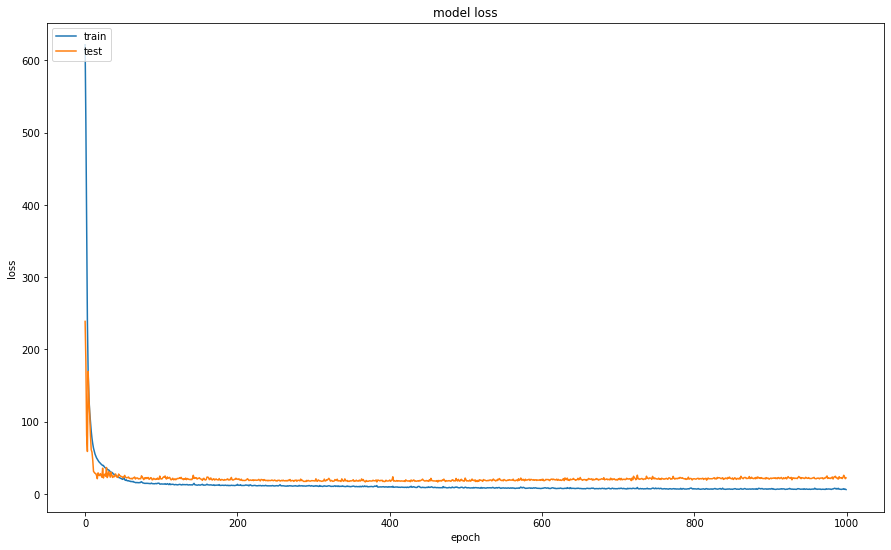

In [274]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

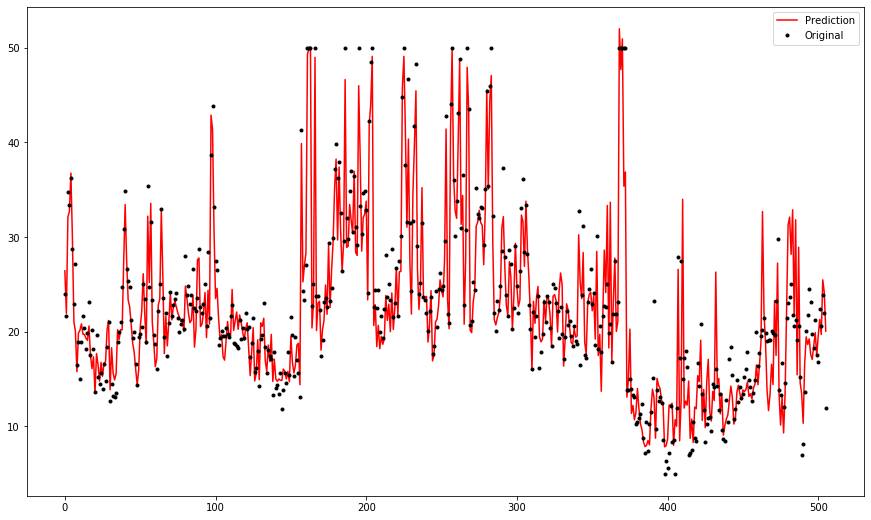

In [275]:
plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### Pre processing & Whitening

Pre processing is a technique where the data input is standardised to fit a normally distibuted dataset i.e. Gaussian with zero mean and unit variance. The learning estimators used in scikit-learn may not return the most accurate results if the data doesn't fit this distribution.[2]

Whitening is a method to remove the correlation between variables that can sometimes be useful in predictions in neural networks.

In [276]:
inputsscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputsscale

,PTRATIO,ZN,LSTAT,INDUS,RAD,RM
0,-1.459000,0.284830,-1.075562,-1.287909,-0.982843,0.413672
1,-0.303094,-0.487722,-0.492439,-0.593381,-0.867883,0.194274
2,-0.303094,-0.487722,-1.208727,-0.593381,-0.867883,1.282714
3,0.113032,-0.487722,-1.361517,-1.306878,-0.752922,1.016303
4,0.113032,-0.487722,-1.026501,-1.306878,-0.752922,1.228577
5,0.113032,-0.487722,-1.043322,-1.306878,-0.752922,0.207096
6,-1.505237,0.048772,-0.031268,-0.476654,-0.523001,-0.388411
7,-1.505237,0.048772,0.910700,-0.476654,-0.523001,-0.160466
8,-1.505237,0.048772,2.421774,-0.476654,-0.523001,-0.931206
9,-1.505237,0.048772,0.623344,-0.476654,-0.523001,-0.399808


In [277]:
pca = dec.PCA(n_components=6, whiten=True)
pca.fit(inputsscale)
inputsscale_white = pd.DataFrame(pca.transform(inputsscale), columns=inputsscale.columns)
inputsscale_white

,PTRATIO,ZN,LSTAT,INDUS,RAD,RM
0,1.281734,-0.493090,-0.573601,-0.453632,-0.439274,1.034806
1,0.474774,-0.299547,-1.123941,0.162312,-0.276017,0.112677
2,0.882789,0.792994,-1.469129,0.124334,-0.024872,-0.184165
3,0.939005,0.679700,-1.387455,1.003484,-0.638212,0.480430
4,0.896590,0.729896,-1.321512,0.865258,-1.064328,-0.042626
5,0.690742,-0.059016,-1.190993,1.090785,-0.610419,0.911142
6,0.494851,-1.057353,-0.186110,-1.126918,-0.423808,0.901753
7,0.299689,-1.203217,0.048146,-1.435795,-1.464077,-0.230429
8,-0.247198,-2.321296,0.574389,-1.685542,-2.646592,-1.003901
9,0.324288,-1.290824,-0.000834,-1.304849,-1.074076,0.270764


In [278]:
# Train the neural network.
history2 = model.fit(inputsscale_white, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 44us/step - loss: 240.3481 - accuracy: 0.0025 - mae: 11.8349 - val_loss: 49.5389 - val_accuracy: 0.0098 - val_mae: 5.7101
Epoch 2/1000
404/404 [==============================] - 0s 44us/step - loss: 128.7481 - accuracy: 0.0025 - mae: 8.4751 - val_loss: 34.4694 - val_accuracy: 0.0000e+00 - val_mae: 4.5338
Epoch 3/1000
404/404 [==============================] - 0s 39us/step - loss: 84.1648 - accuracy: 0.0025 - mae: 6.9373 - val_loss: 25.3112 - val_accuracy: 0.0098 - val_mae: 4.0051
Epoch 4/1000
404/404 [==============================] - 0s 37us/step - loss: 58.9640 - accuracy: 0.0149 - mae: 5.6630 - val_loss: 22.4836 - val_accuracy: 0.0000e+00 - val_mae: 3.8015
Epoch 5/1000
404/404 [==============================] - 0s 39us/step - loss: 45.3790 - accuracy: 0.0099 - mae: 5.0425 - val_loss: 22.7842 - val_accuracy: 0.0000e+00 - val_mae: 3.8490
Epoch 6/1000
404/404 [======================

404/404 [==============================] - 0s 32us/step - loss: 13.4505 - accuracy: 0.0099 - mae: 2.6648 - val_loss: 22.1758 - val_accuracy: 0.0098 - val_mae: 3.6034
Epoch 47/1000
404/404 [==============================] - 0s 32us/step - loss: 13.4731 - accuracy: 0.0149 - mae: 2.6745 - val_loss: 23.5520 - val_accuracy: 0.0098 - val_mae: 3.7274
Epoch 48/1000
404/404 [==============================] - 0s 32us/step - loss: 13.4060 - accuracy: 0.0124 - mae: 2.6553 - val_loss: 21.7885 - val_accuracy: 0.0098 - val_mae: 3.5632
Epoch 49/1000
404/404 [==============================] - 0s 33us/step - loss: 13.0121 - accuracy: 0.0124 - mae: 2.6208 - val_loss: 23.1876 - val_accuracy: 0.0098 - val_mae: 3.6906
Epoch 50/1000
404/404 [==============================] - 0s 32us/step - loss: 12.8612 - accuracy: 0.0149 - mae: 2.6042 - val_loss: 22.5457 - val_accuracy: 0.0098 - val_mae: 3.6294
Epoch 51/1000
404/404 [==============================] - 0s 37us/step - loss: 12.8026 - accuracy: 0.0149 - mae: 2.

404/404 [==============================] - 0s 32us/step - loss: 10.6488 - accuracy: 0.0149 - mae: 2.3526 - val_loss: 25.0098 - val_accuracy: 0.0098 - val_mae: 3.7476
Epoch 92/1000
404/404 [==============================] - 0s 35us/step - loss: 10.4632 - accuracy: 0.0248 - mae: 2.3322 - val_loss: 23.9023 - val_accuracy: 0.0000e+00 - val_mae: 3.6739
Epoch 93/1000
404/404 [==============================] - 0s 35us/step - loss: 10.3749 - accuracy: 0.0173 - mae: 2.3190 - val_loss: 24.1048 - val_accuracy: 0.0098 - val_mae: 3.6848
Epoch 94/1000
404/404 [==============================] - 0s 30us/step - loss: 10.3101 - accuracy: 0.0223 - mae: 2.3022 - val_loss: 23.4436 - val_accuracy: 0.0098 - val_mae: 3.6352
Epoch 95/1000
404/404 [==============================] - 0s 32us/step - loss: 10.3405 - accuracy: 0.0198 - mae: 2.3163 - val_loss: 23.7753 - val_accuracy: 0.0098 - val_mae: 3.6569
Epoch 96/1000
404/404 [==============================] - 0s 30us/step - loss: 10.2330 - accuracy: 0.0248 - mae

404/404 [==============================] - 0s 35us/step - loss: 9.1869 - accuracy: 0.0272 - mae: 2.1708 - val_loss: 24.1652 - val_accuracy: 0.0196 - val_mae: 3.6066
Epoch 137/1000
404/404 [==============================] - 0s 47us/step - loss: 9.1048 - accuracy: 0.0223 - mae: 2.1472 - val_loss: 23.2782 - val_accuracy: 0.0294 - val_mae: 3.5467
Epoch 138/1000
404/404 [==============================] - 0s 42us/step - loss: 9.0499 - accuracy: 0.0223 - mae: 2.1453 - val_loss: 23.6532 - val_accuracy: 0.0294 - val_mae: 3.5725
Epoch 139/1000
404/404 [==============================] - 0s 37us/step - loss: 9.0390 - accuracy: 0.0223 - mae: 2.1450 - val_loss: 23.6934 - val_accuracy: 0.0294 - val_mae: 3.5754
Epoch 140/1000
404/404 [==============================] - 0s 35us/step - loss: 8.9993 - accuracy: 0.0223 - mae: 2.1541 - val_loss: 24.3195 - val_accuracy: 0.0196 - val_mae: 3.6106
Epoch 141/1000
404/404 [==============================] - 0s 31us/step - loss: 9.2038 - accuracy: 0.0347 - mae: 2.1

404/404 [==============================] - 0s 32us/step - loss: 8.1192 - accuracy: 0.0322 - mae: 2.0198 - val_loss: 23.3419 - val_accuracy: 0.0098 - val_mae: 3.5126
Epoch 182/1000
404/404 [==============================] - 0s 35us/step - loss: 8.1666 - accuracy: 0.0272 - mae: 2.0447 - val_loss: 23.9462 - val_accuracy: 0.0196 - val_mae: 3.5297
Epoch 183/1000
404/404 [==============================] - 0s 30us/step - loss: 8.1119 - accuracy: 0.0248 - mae: 2.0207 - val_loss: 23.8140 - val_accuracy: 0.0098 - val_mae: 3.5223
Epoch 184/1000
404/404 [==============================] - 0s 32us/step - loss: 8.0658 - accuracy: 0.0322 - mae: 2.0139 - val_loss: 24.5132 - val_accuracy: 0.0196 - val_mae: 3.5675
Epoch 185/1000
404/404 [==============================] - 0s 35us/step - loss: 8.0870 - accuracy: 0.0223 - mae: 2.0195 - val_loss: 23.7183 - val_accuracy: 0.0098 - val_mae: 3.5264
Epoch 186/1000
404/404 [==============================] - 0s 30us/step - loss: 8.0222 - accuracy: 0.0248 - mae: 2.0

404/404 [==============================] - 0s 32us/step - loss: 7.5443 - accuracy: 0.0223 - mae: 1.9292 - val_loss: 24.0005 - val_accuracy: 0.0098 - val_mae: 3.5337
Epoch 227/1000
404/404 [==============================] - 0s 30us/step - loss: 7.5114 - accuracy: 0.0223 - mae: 1.9295 - val_loss: 24.7519 - val_accuracy: 0.0098 - val_mae: 3.5750
Epoch 228/1000
404/404 [==============================] - 0s 35us/step - loss: 7.4844 - accuracy: 0.0248 - mae: 1.9137 - val_loss: 24.7038 - val_accuracy: 0.0098 - val_mae: 3.5736
Epoch 229/1000
404/404 [==============================] - 0s 35us/step - loss: 7.5008 - accuracy: 0.0297 - mae: 1.9106 - val_loss: 24.8564 - val_accuracy: 0.0098 - val_mae: 3.5858
Epoch 230/1000
404/404 [==============================] - 0s 32us/step - loss: 7.5187 - accuracy: 0.0272 - mae: 1.9211 - val_loss: 24.1519 - val_accuracy: 0.0098 - val_mae: 3.5480
Epoch 231/1000
404/404 [==============================] - 0s 32us/step - loss: 7.4279 - accuracy: 0.0149 - mae: 1.9

404/404 [==============================] - 0s 35us/step - loss: 7.0334 - accuracy: 0.0297 - mae: 1.8614 - val_loss: 24.4764 - val_accuracy: 0.0098 - val_mae: 3.5838
Epoch 272/1000
404/404 [==============================] - 0s 32us/step - loss: 7.0617 - accuracy: 0.0248 - mae: 1.8619 - val_loss: 24.1483 - val_accuracy: 0.0098 - val_mae: 3.5529
Epoch 273/1000
404/404 [==============================] - 0s 35us/step - loss: 7.0244 - accuracy: 0.0272 - mae: 1.8434 - val_loss: 24.6810 - val_accuracy: 0.0098 - val_mae: 3.5834
Epoch 274/1000
404/404 [==============================] - 0s 35us/step - loss: 7.2081 - accuracy: 0.0198 - mae: 1.8837 - val_loss: 25.3845 - val_accuracy: 0.0098 - val_mae: 3.5933
Epoch 275/1000
404/404 [==============================] - 0s 32us/step - loss: 7.2408 - accuracy: 0.0347 - mae: 1.8783 - val_loss: 25.6182 - val_accuracy: 0.0098 - val_mae: 3.6223
Epoch 276/1000
404/404 [==============================] - 0s 32us/step - loss: 7.1032 - accuracy: 0.0272 - mae: 1.8

404/404 [==============================] - 0s 37us/step - loss: 6.7840 - accuracy: 0.0322 - mae: 1.8183 - val_loss: 24.9959 - val_accuracy: 0.0098 - val_mae: 3.6108
Epoch 317/1000
404/404 [==============================] - 0s 37us/step - loss: 6.7786 - accuracy: 0.0322 - mae: 1.8161 - val_loss: 24.9144 - val_accuracy: 0.0098 - val_mae: 3.5871
Epoch 318/1000
404/404 [==============================] - 0s 35us/step - loss: 6.6436 - accuracy: 0.0297 - mae: 1.7837 - val_loss: 25.0885 - val_accuracy: 0.0098 - val_mae: 3.5912
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 6.7361 - accuracy: 0.0322 - mae: 1.7888 - val_loss: 25.4282 - val_accuracy: 0.0098 - val_mae: 3.6138
Epoch 320/1000
404/404 [==============================] - 0s 35us/step - loss: 6.6689 - accuracy: 0.0322 - mae: 1.7978 - val_loss: 25.5333 - val_accuracy: 0.0098 - val_mae: 3.6234
Epoch 321/1000
404/404 [==============================] - 0s 35us/step - loss: 6.7144 - accuracy: 0.0272 - mae: 1.8

404/404 [==============================] - 0s 32us/step - loss: 6.6379 - accuracy: 0.0248 - mae: 1.7869 - val_loss: 25.5822 - val_accuracy: 0.0098 - val_mae: 3.6663
Epoch 362/1000
404/404 [==============================] - 0s 30us/step - loss: 6.4971 - accuracy: 0.0322 - mae: 1.7681 - val_loss: 25.7911 - val_accuracy: 0.0098 - val_mae: 3.6643
Epoch 363/1000
404/404 [==============================] - 0s 30us/step - loss: 6.5107 - accuracy: 0.0347 - mae: 1.7637 - val_loss: 25.1205 - val_accuracy: 0.0098 - val_mae: 3.6358
Epoch 364/1000
404/404 [==============================] - 0s 37us/step - loss: 6.3920 - accuracy: 0.0248 - mae: 1.7497 - val_loss: 26.2332 - val_accuracy: 0.0098 - val_mae: 3.6666
Epoch 365/1000
404/404 [==============================] - 0s 37us/step - loss: 6.3573 - accuracy: 0.0248 - mae: 1.7376 - val_loss: 25.7554 - val_accuracy: 0.0098 - val_mae: 3.6516
Epoch 366/1000
404/404 [==============================] - 0s 39us/step - loss: 6.4212 - accuracy: 0.0223 - mae: 1.7

404/404 [==============================] - 0s 35us/step - loss: 6.1072 - accuracy: 0.0223 - mae: 1.7100 - val_loss: 26.8534 - val_accuracy: 0.0098 - val_mae: 3.6996
Epoch 407/1000
404/404 [==============================] - 0s 35us/step - loss: 6.2063 - accuracy: 0.0248 - mae: 1.7429 - val_loss: 25.5827 - val_accuracy: 0.0098 - val_mae: 3.6345
Epoch 408/1000
404/404 [==============================] - 0s 34us/step - loss: 6.0829 - accuracy: 0.0248 - mae: 1.7014 - val_loss: 26.0372 - val_accuracy: 0.0098 - val_mae: 3.6640
Epoch 409/1000
404/404 [==============================] - 0s 32us/step - loss: 6.0556 - accuracy: 0.0248 - mae: 1.7018 - val_loss: 25.6051 - val_accuracy: 0.0098 - val_mae: 3.6721
Epoch 410/1000
404/404 [==============================] - 0s 30us/step - loss: 6.1040 - accuracy: 0.0223 - mae: 1.7153 - val_loss: 26.6506 - val_accuracy: 0.0098 - val_mae: 3.6937
Epoch 411/1000
404/404 [==============================] - 0s 32us/step - loss: 6.1642 - accuracy: 0.0272 - mae: 1.7

404/404 [==============================] - 0s 32us/step - loss: 5.9232 - accuracy: 0.0173 - mae: 1.6743 - val_loss: 26.3712 - val_accuracy: 0.0098 - val_mae: 3.6939
Epoch 452/1000
404/404 [==============================] - 0s 32us/step - loss: 5.8072 - accuracy: 0.0198 - mae: 1.6518 - val_loss: 25.6266 - val_accuracy: 0.0098 - val_mae: 3.6760
Epoch 453/1000
404/404 [==============================] - 0s 37us/step - loss: 5.9200 - accuracy: 0.0173 - mae: 1.6620 - val_loss: 26.5216 - val_accuracy: 0.0098 - val_mae: 3.7072
Epoch 454/1000
404/404 [==============================] - 0s 47us/step - loss: 6.0776 - accuracy: 0.0248 - mae: 1.6976 - val_loss: 25.0155 - val_accuracy: 0.0098 - val_mae: 3.6682
Epoch 455/1000
404/404 [==============================] - 0s 44us/step - loss: 5.8939 - accuracy: 0.0124 - mae: 1.6613 - val_loss: 26.6254 - val_accuracy: 0.0098 - val_mae: 3.6917
Epoch 456/1000
404/404 [==============================] - 0s 35us/step - loss: 5.8451 - accuracy: 0.0173 - mae: 1.6

404/404 [==============================] - 0s 32us/step - loss: 5.7689 - accuracy: 0.0248 - mae: 1.6402 - val_loss: 27.5355 - val_accuracy: 0.0098 - val_mae: 3.7421
Epoch 497/1000
404/404 [==============================] - 0s 37us/step - loss: 5.6631 - accuracy: 0.0223 - mae: 1.6487 - val_loss: 26.1513 - val_accuracy: 0.0098 - val_mae: 3.6821
Epoch 498/1000
404/404 [==============================] - 0s 32us/step - loss: 5.7268 - accuracy: 0.0149 - mae: 1.6407 - val_loss: 26.1932 - val_accuracy: 0.0098 - val_mae: 3.7038
Epoch 499/1000
404/404 [==============================] - 0s 32us/step - loss: 5.7369 - accuracy: 0.0272 - mae: 1.6367 - val_loss: 26.1218 - val_accuracy: 0.0098 - val_mae: 3.7110
Epoch 500/1000
404/404 [==============================] - 0s 32us/step - loss: 5.6680 - accuracy: 0.0149 - mae: 1.6450 - val_loss: 25.6755 - val_accuracy: 0.0098 - val_mae: 3.6532
Epoch 501/1000
404/404 [==============================] - 0s 30us/step - loss: 5.5944 - accuracy: 0.0297 - mae: 1.6

404/404 [==============================] - 0s 35us/step - loss: 5.5449 - accuracy: 0.0322 - mae: 1.6041 - val_loss: 26.9989 - val_accuracy: 0.0098 - val_mae: 3.7246
Epoch 542/1000
404/404 [==============================] - 0s 33us/step - loss: 5.6450 - accuracy: 0.0223 - mae: 1.6362 - val_loss: 26.6904 - val_accuracy: 0.0098 - val_mae: 3.6894
Epoch 543/1000
404/404 [==============================] - 0s 30us/step - loss: 5.5615 - accuracy: 0.0272 - mae: 1.6129 - val_loss: 26.6710 - val_accuracy: 0.0098 - val_mae: 3.7237
Epoch 544/1000
404/404 [==============================] - 0s 32us/step - loss: 5.5173 - accuracy: 0.0322 - mae: 1.6061 - val_loss: 26.1719 - val_accuracy: 0.0098 - val_mae: 3.6975
Epoch 545/1000
404/404 [==============================] - 0s 35us/step - loss: 5.4584 - accuracy: 0.0198 - mae: 1.6022 - val_loss: 26.9780 - val_accuracy: 0.0098 - val_mae: 3.7306
Epoch 546/1000
404/404 [==============================] - 0s 35us/step - loss: 5.4338 - accuracy: 0.0223 - mae: 1.5

404/404 [==============================] - 0s 35us/step - loss: 5.2511 - accuracy: 0.0297 - mae: 1.5559 - val_loss: 25.6357 - val_accuracy: 0.0098 - val_mae: 3.6604
Epoch 587/1000
404/404 [==============================] - 0s 32us/step - loss: 5.1677 - accuracy: 0.0272 - mae: 1.5589 - val_loss: 27.4753 - val_accuracy: 0.0098 - val_mae: 3.7175
Epoch 588/1000
404/404 [==============================] - 0s 32us/step - loss: 5.2224 - accuracy: 0.0272 - mae: 1.5399 - val_loss: 27.8095 - val_accuracy: 0.0098 - val_mae: 3.7416
Epoch 589/1000
404/404 [==============================] - 0s 35us/step - loss: 5.2858 - accuracy: 0.0149 - mae: 1.5567 - val_loss: 26.2370 - val_accuracy: 0.0098 - val_mae: 3.7030
Epoch 590/1000
404/404 [==============================] - 0s 34us/step - loss: 5.1687 - accuracy: 0.0297 - mae: 1.5375 - val_loss: 27.6446 - val_accuracy: 0.0098 - val_mae: 3.7584
Epoch 591/1000
404/404 [==============================] - 0s 31us/step - loss: 5.3518 - accuracy: 0.0173 - mae: 1.5

404/404 [==============================] - 0s 39us/step - loss: 5.1303 - accuracy: 0.0347 - mae: 1.5325 - val_loss: 27.8755 - val_accuracy: 0.0098 - val_mae: 3.7590
Epoch 632/1000
404/404 [==============================] - 0s 39us/step - loss: 5.1795 - accuracy: 0.0297 - mae: 1.5507 - val_loss: 27.2504 - val_accuracy: 0.0098 - val_mae: 3.7635
Epoch 633/1000
404/404 [==============================] - 0s 35us/step - loss: 5.2972 - accuracy: 0.0371 - mae: 1.5514 - val_loss: 26.7559 - val_accuracy: 0.0098 - val_mae: 3.7356
Epoch 634/1000
404/404 [==============================] - 0s 32us/step - loss: 5.2904 - accuracy: 0.0322 - mae: 1.5888 - val_loss: 26.4832 - val_accuracy: 0.0098 - val_mae: 3.6972
Epoch 635/1000
404/404 [==============================] - 0s 32us/step - loss: 5.1205 - accuracy: 0.0272 - mae: 1.5217 - val_loss: 26.6080 - val_accuracy: 0.0098 - val_mae: 3.7229
Epoch 636/1000
404/404 [==============================] - 0s 32us/step - loss: 4.9751 - accuracy: 0.0297 - mae: 1.5

404/404 [==============================] - 0s 32us/step - loss: 4.8301 - accuracy: 0.0322 - mae: 1.4903 - val_loss: 27.3834 - val_accuracy: 0.0098 - val_mae: 3.7712
Epoch 677/1000
404/404 [==============================] - 0s 32us/step - loss: 4.8675 - accuracy: 0.0272 - mae: 1.4905 - val_loss: 26.9229 - val_accuracy: 0.0098 - val_mae: 3.7630
Epoch 678/1000
404/404 [==============================] - 0s 39us/step - loss: 4.9744 - accuracy: 0.0272 - mae: 1.5215 - val_loss: 26.7876 - val_accuracy: 0.0098 - val_mae: 3.7364
Epoch 679/1000
404/404 [==============================] - 0s 35us/step - loss: 4.8494 - accuracy: 0.0322 - mae: 1.4971 - val_loss: 27.4838 - val_accuracy: 0.0098 - val_mae: 3.7709
Epoch 680/1000
404/404 [==============================] - 0s 42us/step - loss: 4.7969 - accuracy: 0.0347 - mae: 1.4889 - val_loss: 27.8523 - val_accuracy: 0.0098 - val_mae: 3.7773
Epoch 681/1000
404/404 [==============================] - 0s 32us/step - loss: 4.7778 - accuracy: 0.0322 - mae: 1.4

404/404 [==============================] - 0s 35us/step - loss: 4.6464 - accuracy: 0.0322 - mae: 1.4483 - val_loss: 27.9210 - val_accuracy: 0.0098 - val_mae: 3.8009
Epoch 722/1000
404/404 [==============================] - 0s 35us/step - loss: 4.5672 - accuracy: 0.0371 - mae: 1.4464 - val_loss: 27.4819 - val_accuracy: 0.0098 - val_mae: 3.7857
Epoch 723/1000
404/404 [==============================] - 0s 35us/step - loss: 4.5957 - accuracy: 0.0272 - mae: 1.4464 - val_loss: 27.2402 - val_accuracy: 0.0098 - val_mae: 3.7742
Epoch 724/1000
404/404 [==============================] - 0s 32us/step - loss: 4.5760 - accuracy: 0.0371 - mae: 1.4416 - val_loss: 27.3919 - val_accuracy: 0.0098 - val_mae: 3.7695
Epoch 725/1000
404/404 [==============================] - 0s 32us/step - loss: 4.5777 - accuracy: 0.0297 - mae: 1.4531 - val_loss: 28.0255 - val_accuracy: 0.0098 - val_mae: 3.8039
Epoch 726/1000
404/404 [==============================] - 0s 32us/step - loss: 4.7077 - accuracy: 0.0272 - mae: 1.4

404/404 [==============================] - 0s 30us/step - loss: 4.5125 - accuracy: 0.0322 - mae: 1.4325 - val_loss: 27.0366 - val_accuracy: 0.0098 - val_mae: 3.7852
Epoch 767/1000
404/404 [==============================] - 0s 30us/step - loss: 4.4463 - accuracy: 0.0297 - mae: 1.4238 - val_loss: 28.3398 - val_accuracy: 0.0098 - val_mae: 3.8276
Epoch 768/1000
404/404 [==============================] - 0s 32us/step - loss: 4.6364 - accuracy: 0.0198 - mae: 1.4361 - val_loss: 27.2050 - val_accuracy: 0.0098 - val_mae: 3.8284
Epoch 769/1000
404/404 [==============================] - 0s 35us/step - loss: 4.5098 - accuracy: 0.0347 - mae: 1.4265 - val_loss: 27.7336 - val_accuracy: 0.0098 - val_mae: 3.7851
Epoch 770/1000
404/404 [==============================] - 0s 44us/step - loss: 4.6855 - accuracy: 0.0297 - mae: 1.4700 - val_loss: 26.9013 - val_accuracy: 0.0098 - val_mae: 3.7820
Epoch 771/1000
404/404 [==============================] - 0s 49us/step - loss: 4.3972 - accuracy: 0.0421 - mae: 1.4

404/404 [==============================] - 0s 35us/step - loss: 4.5442 - accuracy: 0.0371 - mae: 1.4434 - val_loss: 26.7410 - val_accuracy: 0.0098 - val_mae: 3.7982
Epoch 812/1000
404/404 [==============================] - 0s 32us/step - loss: 4.5271 - accuracy: 0.0347 - mae: 1.4246 - val_loss: 27.4543 - val_accuracy: 0.0098 - val_mae: 3.8089
Epoch 813/1000
404/404 [==============================] - 0s 37us/step - loss: 4.5966 - accuracy: 0.0322 - mae: 1.4483 - val_loss: 27.3580 - val_accuracy: 0.0098 - val_mae: 3.7856
Epoch 814/1000
404/404 [==============================] - 0s 35us/step - loss: 4.4950 - accuracy: 0.0371 - mae: 1.4371 - val_loss: 27.6093 - val_accuracy: 0.0098 - val_mae: 3.8233
Epoch 815/1000
404/404 [==============================] - 0s 31us/step - loss: 4.4362 - accuracy: 0.0297 - mae: 1.4164 - val_loss: 27.7857 - val_accuracy: 0.0098 - val_mae: 3.8245
Epoch 816/1000
404/404 [==============================] - 0s 32us/step - loss: 4.3747 - accuracy: 0.0322 - mae: 1.4

404/404 [==============================] - 0s 35us/step - loss: 4.4695 - accuracy: 0.0347 - mae: 1.4206 - val_loss: 26.8832 - val_accuracy: 0.0098 - val_mae: 3.7963
Epoch 857/1000
404/404 [==============================] - 0s 40us/step - loss: 4.2123 - accuracy: 0.0347 - mae: 1.3688 - val_loss: 27.9891 - val_accuracy: 0.0098 - val_mae: 3.8501
Epoch 858/1000
404/404 [==============================] - 0s 35us/step - loss: 4.2073 - accuracy: 0.0396 - mae: 1.3746 - val_loss: 27.4430 - val_accuracy: 0.0098 - val_mae: 3.8088
Epoch 859/1000
404/404 [==============================] - 0s 32us/step - loss: 4.2500 - accuracy: 0.0272 - mae: 1.3741 - val_loss: 26.9705 - val_accuracy: 0.0098 - val_mae: 3.7932
Epoch 860/1000
404/404 [==============================] - 0s 32us/step - loss: 4.2336 - accuracy: 0.0347 - mae: 1.3635 - val_loss: 29.4075 - val_accuracy: 0.0098 - val_mae: 3.8839
Epoch 861/1000
404/404 [==============================] - 0s 30us/step - loss: 4.1860 - accuracy: 0.0421 - mae: 1.3

404/404 [==============================] - 0s 35us/step - loss: 4.1430 - accuracy: 0.0371 - mae: 1.3443 - val_loss: 26.9346 - val_accuracy: 0.0098 - val_mae: 3.8122
Epoch 902/1000
404/404 [==============================] - 0s 35us/step - loss: 4.0399 - accuracy: 0.0272 - mae: 1.3390 - val_loss: 27.1698 - val_accuracy: 0.0098 - val_mae: 3.8190
Epoch 903/1000
404/404 [==============================] - 0s 35us/step - loss: 4.0856 - accuracy: 0.0297 - mae: 1.3443 - val_loss: 27.8363 - val_accuracy: 0.0098 - val_mae: 3.8376
Epoch 904/1000
404/404 [==============================] - 0s 32us/step - loss: 4.1639 - accuracy: 0.0470 - mae: 1.3458 - val_loss: 27.9783 - val_accuracy: 0.0098 - val_mae: 3.8348
Epoch 905/1000
404/404 [==============================] - 0s 35us/step - loss: 4.1146 - accuracy: 0.0322 - mae: 1.3548 - val_loss: 27.5382 - val_accuracy: 0.0098 - val_mae: 3.8454
Epoch 906/1000
404/404 [==============================] - 0s 32us/step - loss: 4.1649 - accuracy: 0.0396 - mae: 1.3

404/404 [==============================] - 0s 32us/step - loss: 3.9632 - accuracy: 0.0446 - mae: 1.3407 - val_loss: 27.0863 - val_accuracy: 0.0098 - val_mae: 3.8306
Epoch 947/1000
404/404 [==============================] - 0s 34us/step - loss: 4.0620 - accuracy: 0.0371 - mae: 1.3286 - val_loss: 28.4374 - val_accuracy: 0.0098 - val_mae: 3.8574
Epoch 948/1000
404/404 [==============================] - 0s 35us/step - loss: 4.0119 - accuracy: 0.0421 - mae: 1.3453 - val_loss: 26.4338 - val_accuracy: 0.0098 - val_mae: 3.8151
Epoch 949/1000
404/404 [==============================] - 0s 35us/step - loss: 4.0824 - accuracy: 0.0371 - mae: 1.3519 - val_loss: 27.2328 - val_accuracy: 0.0098 - val_mae: 3.8362
Epoch 950/1000
404/404 [==============================] - 0s 32us/step - loss: 4.0661 - accuracy: 0.0248 - mae: 1.3281 - val_loss: 27.7973 - val_accuracy: 0.0098 - val_mae: 3.8499
Epoch 951/1000
404/404 [==============================] - 0s 35us/step - loss: 3.9476 - accuracy: 0.0446 - mae: 1.3

404/404 [==============================] - 0s 35us/step - loss: 3.7898 - accuracy: 0.0322 - mae: 1.2921 - val_loss: 27.5541 - val_accuracy: 0.0098 - val_mae: 3.8545
Epoch 992/1000
404/404 [==============================] - 0s 35us/step - loss: 3.8582 - accuracy: 0.0322 - mae: 1.2996 - val_loss: 27.3991 - val_accuracy: 0.0098 - val_mae: 3.8422
Epoch 993/1000
404/404 [==============================] - 0s 37us/step - loss: 3.9195 - accuracy: 0.0371 - mae: 1.3179 - val_loss: 28.9040 - val_accuracy: 0.0098 - val_mae: 3.9024
Epoch 994/1000
404/404 [==============================] - 0s 37us/step - loss: 3.9030 - accuracy: 0.0371 - mae: 1.3260 - val_loss: 26.8614 - val_accuracy: 0.0098 - val_mae: 3.8282
Epoch 995/1000
404/404 [==============================] - 0s 35us/step - loss: 3.8267 - accuracy: 0.0421 - mae: 1.2937 - val_loss: 27.5388 - val_accuracy: 0.0098 - val_mae: 3.8638
Epoch 996/1000
404/404 [==============================] - 0s 30us/step - loss: 3.8803 - accuracy: 0.0396 - mae: 1.2

In [279]:
p2 = model.predict(inputsscale_white)
history2

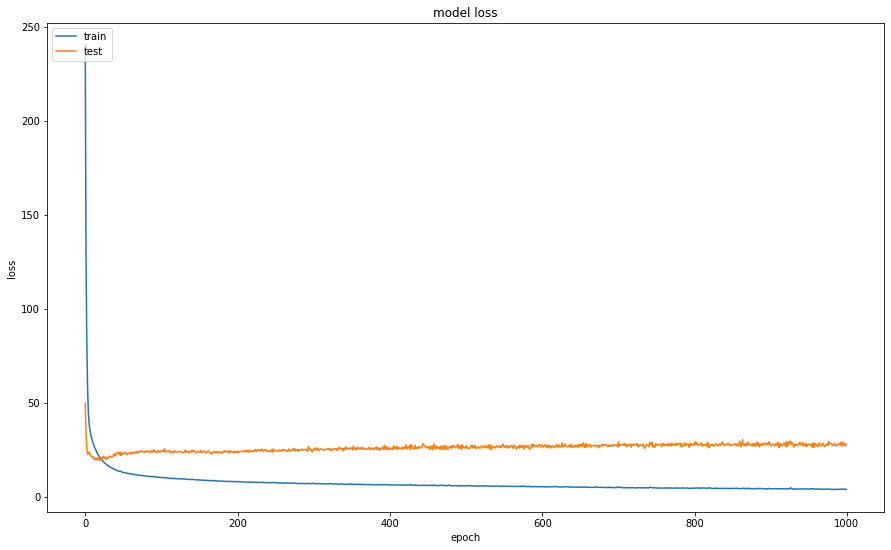

In [280]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

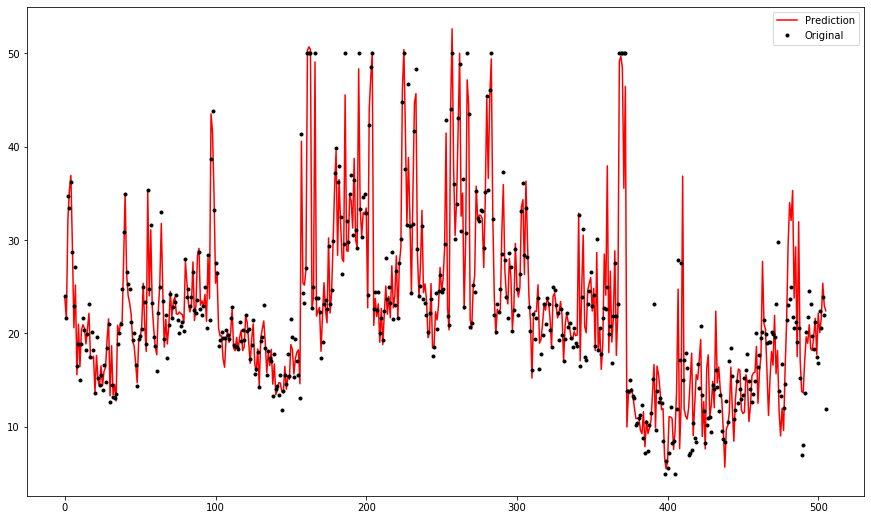

In [281]:
plt.plot(p2, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### All Inputs

In [282]:
# Start a neural network, building it by layers.
modelall = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 13.
modelall.add(kr.layers.Dense(64, input_dim=13, activation='relu'))
modelall.add(kr.layers.Dense(10, activation="softplus"))
modelall.add(kr.layers.Dense(10, activation="relu"))
modelall.add(kr.layers.Dense(1, activation="softplus"))

# Build the graph./ Try loss mean_squared_error as well.
modelall.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae'])

In [283]:
history3 = modelall.fit(inputsall, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 245us/step - loss: 120.0841 - accuracy: 0.0099 - mae: 8.0292 - val_loss: 34.8367 - val_accuracy: 0.0098 - val_mae: 4.8178
Epoch 2/1000
404/404 [==============================] - 0s 32us/step - loss: 77.1401 - accuracy: 0.0050 - mae: 6.4707 - val_loss: 33.4458 - val_accuracy: 0.0098 - val_mae: 4.6560
Epoch 3/1000
404/404 [==============================] - 0s 37us/step - loss: 68.9773 - accuracy: 0.0099 - mae: 6.0355 - val_loss: 72.3286 - val_accuracy: 0.0000e+00 - val_mae: 7.1650
Epoch 4/1000
404/404 [==============================] - 0s 35us/step - loss: 69.3161 - accuracy: 0.0000e+00 - mae: 6.0156 - val_loss: 80.0718 - val_accuracy: 0.0098 - val_mae: 7.5462
Epoch 5/1000
404/404 [==============================] - 0s 32us/step - loss: 65.0449 - accuracy: 0.0074 - mae: 5.7370 - val_loss: 87.3820 - val_accuracy: 0.0000e+00 - val_mae: 7.5473
Epoch 6/1000
404/404 [=======================

Epoch 46/1000
404/404 [==============================] - 0s 37us/step - loss: 27.3428 - accuracy: 0.0149 - mae: 3.9123 - val_loss: 55.1726 - val_accuracy: 0.0098 - val_mae: 6.0248
Epoch 47/1000
404/404 [==============================] - 0s 35us/step - loss: 27.3061 - accuracy: 0.0173 - mae: 3.8866 - val_loss: 40.6719 - val_accuracy: 0.0098 - val_mae: 5.2609
Epoch 48/1000
404/404 [==============================] - 0s 37us/step - loss: 26.3796 - accuracy: 0.0074 - mae: 3.7158 - val_loss: 23.4116 - val_accuracy: 0.0196 - val_mae: 3.8950
Epoch 49/1000
404/404 [==============================] - 0s 35us/step - loss: 28.2152 - accuracy: 0.0124 - mae: 3.9417 - val_loss: 52.0028 - val_accuracy: 0.0098 - val_mae: 6.0432
Epoch 50/1000
404/404 [==============================] - 0s 32us/step - loss: 27.6077 - accuracy: 0.0173 - mae: 3.9128 - val_loss: 32.5849 - val_accuracy: 0.0000e+00 - val_mae: 4.8728
Epoch 51/1000
404/404 [==============================] - 0s 35us/step - loss: 26.8553 - accuracy

Epoch 91/1000
404/404 [==============================] - 0s 30us/step - loss: 19.1176 - accuracy: 0.0198 - mae: 3.1330 - val_loss: 28.7399 - val_accuracy: 0.0098 - val_mae: 4.4030
Epoch 92/1000
404/404 [==============================] - 0s 32us/step - loss: 16.9859 - accuracy: 0.0124 - mae: 3.0131 - val_loss: 33.0545 - val_accuracy: 0.0000e+00 - val_mae: 4.8213
Epoch 93/1000
404/404 [==============================] - 0s 37us/step - loss: 17.6136 - accuracy: 0.0124 - mae: 3.0721 - val_loss: 27.1077 - val_accuracy: 0.0000e+00 - val_mae: 4.2016
Epoch 94/1000
404/404 [==============================] - 0s 32us/step - loss: 18.3800 - accuracy: 0.0149 - mae: 3.2104 - val_loss: 38.9473 - val_accuracy: 0.0000e+00 - val_mae: 5.2985
Epoch 95/1000
404/404 [==============================] - 0s 32us/step - loss: 19.7096 - accuracy: 0.0124 - mae: 3.2444 - val_loss: 32.5005 - val_accuracy: 0.0098 - val_mae: 4.6343
Epoch 96/1000
404/404 [==============================] - 0s 39us/step - loss: 17.6186 - 

Epoch 136/1000
404/404 [==============================] - 0s 30us/step - loss: 15.7387 - accuracy: 0.0149 - mae: 2.8414 - val_loss: 26.9684 - val_accuracy: 0.0196 - val_mae: 4.1921
Epoch 137/1000
404/404 [==============================] - 0s 30us/step - loss: 16.4394 - accuracy: 0.0223 - mae: 2.8773 - val_loss: 24.4669 - val_accuracy: 0.0098 - val_mae: 3.9547
Epoch 138/1000
404/404 [==============================] - 0s 32us/step - loss: 14.7184 - accuracy: 0.0198 - mae: 2.7800 - val_loss: 29.3326 - val_accuracy: 0.0098 - val_mae: 4.3888
Epoch 139/1000
404/404 [==============================] - 0s 32us/step - loss: 15.0370 - accuracy: 0.0223 - mae: 2.8350 - val_loss: 33.4116 - val_accuracy: 0.0000e+00 - val_mae: 4.7008
Epoch 140/1000
404/404 [==============================] - 0s 32us/step - loss: 15.1897 - accuracy: 0.0149 - mae: 2.8448 - val_loss: 36.2954 - val_accuracy: 0.0196 - val_mae: 4.8907
Epoch 141/1000
404/404 [==============================] - 0s 32us/step - loss: 15.6716 - ac

Epoch 181/1000
404/404 [==============================] - 0s 32us/step - loss: 14.8392 - accuracy: 0.0149 - mae: 2.7631 - val_loss: 27.2214 - val_accuracy: 0.0098 - val_mae: 4.0293
Epoch 182/1000
404/404 [==============================] - 0s 27us/step - loss: 14.4044 - accuracy: 0.0149 - mae: 2.7662 - val_loss: 31.3542 - val_accuracy: 0.0196 - val_mae: 4.6289
Epoch 183/1000
404/404 [==============================] - 0s 27us/step - loss: 16.3183 - accuracy: 0.0124 - mae: 2.9133 - val_loss: 23.3763 - val_accuracy: 0.0000e+00 - val_mae: 3.7324
Epoch 184/1000
404/404 [==============================] - 0s 32us/step - loss: 15.4898 - accuracy: 0.0248 - mae: 2.8195 - val_loss: 25.7585 - val_accuracy: 0.0196 - val_mae: 4.0121
Epoch 185/1000
404/404 [==============================] - 0s 30us/step - loss: 13.6400 - accuracy: 0.0099 - mae: 2.6561 - val_loss: 29.2287 - val_accuracy: 0.0098 - val_mae: 4.3675
Epoch 186/1000
404/404 [==============================] - 0s 37us/step - loss: 15.3087 - ac

404/404 [==============================] - 0s 35us/step - loss: 13.8715 - accuracy: 0.0223 - mae: 2.7009 - val_loss: 32.4752 - val_accuracy: 0.0098 - val_mae: 4.5929
Epoch 227/1000
404/404 [==============================] - 0s 30us/step - loss: 12.5307 - accuracy: 0.0223 - mae: 2.5602 - val_loss: 24.8967 - val_accuracy: 0.0000e+00 - val_mae: 3.9340
Epoch 228/1000
404/404 [==============================] - 0s 32us/step - loss: 15.6684 - accuracy: 0.0074 - mae: 2.8268 - val_loss: 28.2385 - val_accuracy: 0.0196 - val_mae: 4.1953
Epoch 229/1000
404/404 [==============================] - 0s 32us/step - loss: 12.9034 - accuracy: 0.0149 - mae: 2.5330 - val_loss: 25.8997 - val_accuracy: 0.0098 - val_mae: 3.9657
Epoch 230/1000
404/404 [==============================] - 0s 35us/step - loss: 12.4097 - accuracy: 0.0173 - mae: 2.5168 - val_loss: 32.6454 - val_accuracy: 0.0098 - val_mae: 4.5146
Epoch 231/1000
404/404 [==============================] - 0s 32us/step - loss: 12.6082 - accuracy: 0.0149 

404/404 [==============================] - 0s 35us/step - loss: 13.4921 - accuracy: 0.0074 - mae: 2.6946 - val_loss: 34.3501 - val_accuracy: 0.0000e+00 - val_mae: 4.5878
Epoch 272/1000
404/404 [==============================] - 0s 33us/step - loss: 12.7425 - accuracy: 0.0198 - mae: 2.5209 - val_loss: 33.6667 - val_accuracy: 0.0196 - val_mae: 4.6320
Epoch 273/1000
404/404 [==============================] - 0s 39us/step - loss: 12.1493 - accuracy: 0.0124 - mae: 2.5089 - val_loss: 33.3278 - val_accuracy: 0.0098 - val_mae: 4.5728
Epoch 274/1000
404/404 [==============================] - 0s 32us/step - loss: 12.9128 - accuracy: 0.0149 - mae: 2.5487 - val_loss: 26.2767 - val_accuracy: 0.0098 - val_mae: 3.9395
Epoch 275/1000
404/404 [==============================] - 0s 32us/step - loss: 12.4506 - accuracy: 0.0198 - mae: 2.5476 - val_loss: 36.8557 - val_accuracy: 0.0294 - val_mae: 4.8660
Epoch 276/1000
404/404 [==============================] - 0s 30us/step - loss: 12.5401 - accuracy: 0.0223 

404/404 [==============================] - 0s 32us/step - loss: 16.1023 - accuracy: 0.0099 - mae: 2.9258 - val_loss: 31.7211 - val_accuracy: 0.0098 - val_mae: 4.3185
Epoch 317/1000
404/404 [==============================] - 0s 35us/step - loss: 12.2597 - accuracy: 0.0198 - mae: 2.5797 - val_loss: 30.0631 - val_accuracy: 0.0098 - val_mae: 4.1732
Epoch 318/1000
404/404 [==============================] - 0s 35us/step - loss: 11.7539 - accuracy: 0.0322 - mae: 2.4516 - val_loss: 30.0887 - val_accuracy: 0.0000e+00 - val_mae: 4.1616
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 12.1937 - accuracy: 0.0198 - mae: 2.5346 - val_loss: 30.3951 - val_accuracy: 0.0196 - val_mae: 4.2235
Epoch 320/1000
404/404 [==============================] - 0s 30us/step - loss: 14.4948 - accuracy: 0.0173 - mae: 2.7771 - val_loss: 37.9709 - val_accuracy: 0.0000e+00 - val_mae: 4.8868
Epoch 321/1000
404/404 [==============================] - 0s 32us/step - loss: 12.0863 - accuracy: 0.0

404/404 [==============================] - 0s 32us/step - loss: 12.0705 - accuracy: 0.0149 - mae: 2.4838 - val_loss: 38.2070 - val_accuracy: 0.0098 - val_mae: 4.8123
Epoch 362/1000
404/404 [==============================] - 0s 32us/step - loss: 12.7633 - accuracy: 0.0124 - mae: 2.6903 - val_loss: 29.8978 - val_accuracy: 0.0196 - val_mae: 3.9573
Epoch 363/1000
404/404 [==============================] - 0s 42us/step - loss: 11.3801 - accuracy: 0.0248 - mae: 2.4375 - val_loss: 28.6433 - val_accuracy: 0.0196 - val_mae: 3.7817
Epoch 364/1000
404/404 [==============================] - 0s 30us/step - loss: 10.6848 - accuracy: 0.0223 - mae: 2.3193 - val_loss: 33.2188 - val_accuracy: 0.0196 - val_mae: 4.1917
Epoch 365/1000
404/404 [==============================] - 0s 32us/step - loss: 12.6186 - accuracy: 0.0173 - mae: 2.5678 - val_loss: 34.5044 - val_accuracy: 0.0098 - val_mae: 4.3490
Epoch 366/1000
404/404 [==============================] - 0s 37us/step - loss: 11.4111 - accuracy: 0.0223 - ma

404/404 [==============================] - 0s 32us/step - loss: 10.2953 - accuracy: 0.0124 - mae: 2.2729 - val_loss: 34.7613 - val_accuracy: 0.0000e+00 - val_mae: 4.3031
Epoch 407/1000
404/404 [==============================] - 0s 32us/step - loss: 10.4974 - accuracy: 0.0149 - mae: 2.2858 - val_loss: 28.7327 - val_accuracy: 0.0098 - val_mae: 3.7480
Epoch 408/1000
404/404 [==============================] - 0s 32us/step - loss: 12.3914 - accuracy: 0.0248 - mae: 2.4993 - val_loss: 53.8675 - val_accuracy: 0.0000e+00 - val_mae: 5.7024
Epoch 409/1000
404/404 [==============================] - 0s 32us/step - loss: 11.7557 - accuracy: 0.0272 - mae: 2.5577 - val_loss: 31.2957 - val_accuracy: 0.0000e+00 - val_mae: 3.9137
Epoch 410/1000
404/404 [==============================] - 0s 32us/step - loss: 11.5159 - accuracy: 0.0173 - mae: 2.4865 - val_loss: 43.0944 - val_accuracy: 0.0196 - val_mae: 4.9770
Epoch 411/1000
404/404 [==============================] - 0s 32us/step - loss: 14.2687 - accuracy:

404/404 [==============================] - 0s 32us/step - loss: 10.6756 - accuracy: 0.0297 - mae: 2.4068 - val_loss: 33.1201 - val_accuracy: 0.0000e+00 - val_mae: 4.1133
Epoch 452/1000
404/404 [==============================] - 0s 35us/step - loss: 10.5927 - accuracy: 0.0173 - mae: 2.4082 - val_loss: 39.7891 - val_accuracy: 0.0196 - val_mae: 4.5696
Epoch 453/1000
404/404 [==============================] - 0s 32us/step - loss: 9.7992 - accuracy: 0.0198 - mae: 2.1923 - val_loss: 39.0906 - val_accuracy: 0.0098 - val_mae: 4.5056
Epoch 454/1000
404/404 [==============================] - 0s 32us/step - loss: 11.2461 - accuracy: 0.0297 - mae: 2.4442 - val_loss: 31.2020 - val_accuracy: 0.0000e+00 - val_mae: 3.9586
Epoch 455/1000
404/404 [==============================] - 0s 32us/step - loss: 13.2435 - accuracy: 0.0297 - mae: 2.6593 - val_loss: 32.9977 - val_accuracy: 0.0098 - val_mae: 4.1752
Epoch 456/1000
404/404 [==============================] - 0s 30us/step - loss: 12.0064 - accuracy: 0.01

404/404 [==============================] - 0s 32us/step - loss: 11.0413 - accuracy: 0.0272 - mae: 2.4611 - val_loss: 42.1816 - val_accuracy: 0.0000e+00 - val_mae: 4.5308
Epoch 497/1000
404/404 [==============================] - 0s 32us/step - loss: 9.9069 - accuracy: 0.0371 - mae: 2.2572 - val_loss: 40.2730 - val_accuracy: 0.0000e+00 - val_mae: 4.5285
Epoch 498/1000
404/404 [==============================] - 0s 33us/step - loss: 9.1085 - accuracy: 0.0173 - mae: 2.1690 - val_loss: 36.2442 - val_accuracy: 0.0098 - val_mae: 4.1158
Epoch 499/1000
404/404 [==============================] - 0s 30us/step - loss: 9.5060 - accuracy: 0.0198 - mae: 2.2242 - val_loss: 41.3196 - val_accuracy: 0.0098 - val_mae: 4.4364
Epoch 500/1000
404/404 [==============================] - 0s 32us/step - loss: 9.4681 - accuracy: 0.0272 - mae: 2.2057 - val_loss: 34.3969 - val_accuracy: 0.0196 - val_mae: 3.8721
Epoch 501/1000
404/404 [==============================] - 0s 30us/step - loss: 10.0634 - accuracy: 0.0149 

Epoch 541/1000
404/404 [==============================] - 0s 32us/step - loss: 9.6876 - accuracy: 0.0248 - mae: 2.2872 - val_loss: 58.3983 - val_accuracy: 0.0196 - val_mae: 5.4917
Epoch 542/1000
404/404 [==============================] - 0s 32us/step - loss: 10.8258 - accuracy: 0.0074 - mae: 2.5286 - val_loss: 68.8226 - val_accuracy: 0.0098 - val_mae: 6.8125
Epoch 543/1000
404/404 [==============================] - 0s 32us/step - loss: 12.9036 - accuracy: 0.0124 - mae: 2.5679 - val_loss: 37.1259 - val_accuracy: 0.0098 - val_mae: 4.1313
Epoch 544/1000
404/404 [==============================] - 0s 27us/step - loss: 10.0227 - accuracy: 0.0248 - mae: 2.3337 - val_loss: 46.3466 - val_accuracy: 0.0098 - val_mae: 5.0215
Epoch 545/1000
404/404 [==============================] - 0s 30us/step - loss: 9.4768 - accuracy: 0.0297 - mae: 2.2769 - val_loss: 52.9009 - val_accuracy: 0.0196 - val_mae: 5.0633
Epoch 546/1000
404/404 [==============================] - 0s 32us/step - loss: 10.0298 - accuracy

404/404 [==============================] - 0s 35us/step - loss: 10.7832 - accuracy: 0.0297 - mae: 2.4226 - val_loss: 49.2848 - val_accuracy: 0.0000e+00 - val_mae: 4.8978
Epoch 587/1000
404/404 [==============================] - 0s 35us/step - loss: 9.5632 - accuracy: 0.0124 - mae: 2.2352 - val_loss: 45.7823 - val_accuracy: 0.0098 - val_mae: 4.7785
Epoch 588/1000
404/404 [==============================] - 0s 37us/step - loss: 12.0701 - accuracy: 0.0124 - mae: 2.5850 - val_loss: 58.6137 - val_accuracy: 0.0000e+00 - val_mae: 5.4159
Epoch 589/1000
404/404 [==============================] - 0s 39us/step - loss: 12.0421 - accuracy: 0.0223 - mae: 2.5178 - val_loss: 55.0568 - val_accuracy: 0.0098 - val_mae: 5.4020
Epoch 590/1000
404/404 [==============================] - 0s 32us/step - loss: 15.1936 - accuracy: 0.0099 - mae: 2.8163 - val_loss: 47.2614 - val_accuracy: 0.0098 - val_mae: 4.8497
Epoch 591/1000
404/404 [==============================] - 0s 30us/step - loss: 10.3889 - accuracy: 0.01

404/404 [==============================] - 0s 30us/step - loss: 10.8402 - accuracy: 0.0124 - mae: 2.4179 - val_loss: 63.9781 - val_accuracy: 0.0000e+00 - val_mae: 5.4335
Epoch 632/1000
404/404 [==============================] - 0s 30us/step - loss: 8.8941 - accuracy: 0.0173 - mae: 2.1837 - val_loss: 44.1302 - val_accuracy: 0.0098 - val_mae: 4.2742
Epoch 633/1000
404/404 [==============================] - 0s 30us/step - loss: 10.9434 - accuracy: 0.0173 - mae: 2.4543 - val_loss: 49.4924 - val_accuracy: 0.0098 - val_mae: 4.8756
Epoch 634/1000
404/404 [==============================] - 0s 35us/step - loss: 8.6083 - accuracy: 0.0272 - mae: 2.0949 - val_loss: 56.5295 - val_accuracy: 0.0000e+00 - val_mae: 5.0918
Epoch 635/1000
404/404 [==============================] - 0s 32us/step - loss: 8.1143 - accuracy: 0.0297 - mae: 2.0175 - val_loss: 49.4430 - val_accuracy: 0.0098 - val_mae: 4.6279
Epoch 636/1000
404/404 [==============================] - 0s 32us/step - loss: 8.1903 - accuracy: 0.0173 

Epoch 676/1000
404/404 [==============================] - 0s 32us/step - loss: 8.9987 - accuracy: 0.0272 - mae: 2.1922 - val_loss: 57.0378 - val_accuracy: 0.0098 - val_mae: 5.1967
Epoch 677/1000
404/404 [==============================] - 0s 35us/step - loss: 7.8515 - accuracy: 0.0173 - mae: 2.0016 - val_loss: 52.8550 - val_accuracy: 0.0098 - val_mae: 4.7509
Epoch 678/1000
404/404 [==============================] - 0s 30us/step - loss: 7.9958 - accuracy: 0.0248 - mae: 2.0446 - val_loss: 54.4410 - val_accuracy: 0.0098 - val_mae: 4.8806
Epoch 679/1000
404/404 [==============================] - 0s 37us/step - loss: 7.6544 - accuracy: 0.0173 - mae: 2.0494 - val_loss: 63.2474 - val_accuracy: 0.0000e+00 - val_mae: 5.5259
Epoch 680/1000
404/404 [==============================] - 0s 32us/step - loss: 9.3818 - accuracy: 0.0149 - mae: 2.2183 - val_loss: 56.5969 - val_accuracy: 0.0196 - val_mae: 5.1270
Epoch 681/1000
404/404 [==============================] - 0s 32us/step - loss: 11.0608 - accurac

404/404 [==============================] - 0s 32us/step - loss: 9.5680 - accuracy: 0.0223 - mae: 2.2117 - val_loss: 62.6159 - val_accuracy: 0.0098 - val_mae: 5.1194
Epoch 722/1000
404/404 [==============================] - 0s 30us/step - loss: 9.4111 - accuracy: 0.0198 - mae: 2.3122 - val_loss: 54.6248 - val_accuracy: 0.0098 - val_mae: 4.9623
Epoch 723/1000
404/404 [==============================] - 0s 32us/step - loss: 9.6050 - accuracy: 0.0124 - mae: 2.2258 - val_loss: 53.1677 - val_accuracy: 0.0098 - val_mae: 5.2464
Epoch 724/1000
404/404 [==============================] - 0s 32us/step - loss: 8.2775 - accuracy: 0.0248 - mae: 2.1388 - val_loss: 57.3813 - val_accuracy: 0.0000e+00 - val_mae: 4.9659
Epoch 725/1000
404/404 [==============================] - 0s 35us/step - loss: 7.9983 - accuracy: 0.0248 - mae: 2.0128 - val_loss: 62.0452 - val_accuracy: 0.0000e+00 - val_mae: 5.5764
Epoch 726/1000
404/404 [==============================] - 0s 32us/step - loss: 8.4887 - accuracy: 0.0173 - 

404/404 [==============================] - 0s 30us/step - loss: 6.8358 - accuracy: 0.0272 - mae: 1.9257 - val_loss: 59.6141 - val_accuracy: 0.0000e+00 - val_mae: 5.2206
Epoch 767/1000
404/404 [==============================] - 0s 32us/step - loss: 7.4771 - accuracy: 0.0272 - mae: 1.9856 - val_loss: 56.9960 - val_accuracy: 0.0196 - val_mae: 4.8265
Epoch 768/1000
404/404 [==============================] - 0s 32us/step - loss: 6.8689 - accuracy: 0.0248 - mae: 1.9118 - val_loss: 63.6150 - val_accuracy: 0.0000e+00 - val_mae: 5.1840
Epoch 769/1000
404/404 [==============================] - 0s 32us/step - loss: 6.7427 - accuracy: 0.0297 - mae: 1.9007 - val_loss: 61.7200 - val_accuracy: 0.0098 - val_mae: 5.5682
Epoch 770/1000
404/404 [==============================] - 0s 30us/step - loss: 7.3168 - accuracy: 0.0322 - mae: 2.0163 - val_loss: 60.9176 - val_accuracy: 0.0000e+00 - val_mae: 4.9806
Epoch 771/1000
404/404 [==============================] - 0s 30us/step - loss: 6.8839 - accuracy: 0.012

404/404 [==============================] - 0s 37us/step - loss: 7.6674 - accuracy: 0.0173 - mae: 2.0168 - val_loss: 62.4636 - val_accuracy: 0.0000e+00 - val_mae: 5.3522
Epoch 812/1000
404/404 [==============================] - 0s 35us/step - loss: 7.8887 - accuracy: 0.0223 - mae: 2.0369 - val_loss: 68.6673 - val_accuracy: 0.0000e+00 - val_mae: 5.7215
Epoch 813/1000
404/404 [==============================] - 0s 32us/step - loss: 7.9924 - accuracy: 0.0198 - mae: 2.0817 - val_loss: 99.0248 - val_accuracy: 0.0098 - val_mae: 6.5840
Epoch 814/1000
404/404 [==============================] - 0s 32us/step - loss: 9.9644 - accuracy: 0.0322 - mae: 2.3331 - val_loss: 65.8218 - val_accuracy: 0.0000e+00 - val_mae: 5.2911
Epoch 815/1000
404/404 [==============================] - 0s 35us/step - loss: 9.6284 - accuracy: 0.0149 - mae: 2.4020 - val_loss: 59.9291 - val_accuracy: 0.0000e+00 - val_mae: 5.6382
Epoch 816/1000
404/404 [==============================] - 0s 35us/step - loss: 9.9633 - accuracy: 0

404/404 [==============================] - 0s 32us/step - loss: 6.5807 - accuracy: 0.0173 - mae: 1.8700 - val_loss: 63.2302 - val_accuracy: 0.0000e+00 - val_mae: 4.9943
Epoch 857/1000
404/404 [==============================] - 0s 30us/step - loss: 7.3259 - accuracy: 0.0223 - mae: 2.0354 - val_loss: 58.6638 - val_accuracy: 0.0000e+00 - val_mae: 4.9900
Epoch 858/1000
404/404 [==============================] - 0s 32us/step - loss: 6.8353 - accuracy: 0.0248 - mae: 1.9390 - val_loss: 55.3950 - val_accuracy: 0.0196 - val_mae: 4.8979
Epoch 859/1000
404/404 [==============================] - 0s 32us/step - loss: 10.9040 - accuracy: 0.0173 - mae: 2.3636 - val_loss: 53.1409 - val_accuracy: 0.0098 - val_mae: 4.7109
Epoch 860/1000
404/404 [==============================] - 0s 30us/step - loss: 8.6168 - accuracy: 0.0322 - mae: 2.1608 - val_loss: 67.5920 - val_accuracy: 0.0000e+00 - val_mae: 5.4071
Epoch 861/1000
404/404 [==============================] - 0s 30us/step - loss: 7.3192 - accuracy: 0.01

404/404 [==============================] - 0s 39us/step - loss: 7.9564 - accuracy: 0.0198 - mae: 2.0245 - val_loss: 61.6022 - val_accuracy: 0.0000e+00 - val_mae: 4.7829
Epoch 902/1000
404/404 [==============================] - 0s 39us/step - loss: 7.0879 - accuracy: 0.0248 - mae: 2.0356 - val_loss: 58.4529 - val_accuracy: 0.0098 - val_mae: 4.5034
Epoch 903/1000
404/404 [==============================] - 0s 32us/step - loss: 6.5800 - accuracy: 0.0223 - mae: 1.8650 - val_loss: 55.9310 - val_accuracy: 0.0196 - val_mae: 4.3989
Epoch 904/1000
404/404 [==============================] - 0s 35us/step - loss: 5.8952 - accuracy: 0.0272 - mae: 1.8457 - val_loss: 60.0536 - val_accuracy: 0.0196 - val_mae: 4.5659
Epoch 905/1000
404/404 [==============================] - 0s 39us/step - loss: 5.9231 - accuracy: 0.0371 - mae: 1.7899 - val_loss: 59.4583 - val_accuracy: 0.0098 - val_mae: 4.9275
Epoch 906/1000
404/404 [==============================] - 0s 35us/step - loss: 9.3441 - accuracy: 0.0124 - mae:

Epoch 946/1000
404/404 [==============================] - 0s 35us/step - loss: 4.8745 - accuracy: 0.0223 - mae: 1.6513 - val_loss: 69.7876 - val_accuracy: 0.0196 - val_mae: 5.5601
Epoch 947/1000
404/404 [==============================] - 0s 35us/step - loss: 5.3681 - accuracy: 0.0198 - mae: 1.7735 - val_loss: 64.2683 - val_accuracy: 0.0000e+00 - val_mae: 5.5045
Epoch 948/1000
404/404 [==============================] - 0s 32us/step - loss: 5.4000 - accuracy: 0.0347 - mae: 1.7583 - val_loss: 69.2922 - val_accuracy: 0.0098 - val_mae: 5.6151
Epoch 949/1000
404/404 [==============================] - 0s 34us/step - loss: 5.6083 - accuracy: 0.0149 - mae: 1.7698 - val_loss: 72.7500 - val_accuracy: 0.0098 - val_mae: 5.8171
Epoch 950/1000
404/404 [==============================] - 0s 35us/step - loss: 5.6789 - accuracy: 0.0198 - mae: 1.7554 - val_loss: 84.6057 - val_accuracy: 0.0000e+00 - val_mae: 6.3462
Epoch 951/1000
404/404 [==============================] - 0s 32us/step - loss: 5.1621 - accu

404/404 [==============================] - 0s 35us/step - loss: 4.9976 - accuracy: 0.0173 - mae: 1.6921 - val_loss: 72.4479 - val_accuracy: 0.0098 - val_mae: 5.8848
Epoch 992/1000
404/404 [==============================] - 0s 35us/step - loss: 5.5318 - accuracy: 0.0297 - mae: 1.7346 - val_loss: 82.6692 - val_accuracy: 0.0098 - val_mae: 6.5389
Epoch 993/1000
404/404 [==============================] - 0s 37us/step - loss: 5.0448 - accuracy: 0.0223 - mae: 1.6732 - val_loss: 82.6554 - val_accuracy: 0.0000e+00 - val_mae: 6.4671
Epoch 994/1000
404/404 [==============================] - 0s 35us/step - loss: 6.9673 - accuracy: 0.0223 - mae: 1.9864 - val_loss: 79.5301 - val_accuracy: 0.0098 - val_mae: 6.3390
Epoch 995/1000
404/404 [==============================] - 0s 32us/step - loss: 7.0751 - accuracy: 0.0223 - mae: 2.0625 - val_loss: 76.2615 - val_accuracy: 0.0000e+00 - val_mae: 6.1841
Epoch 996/1000
404/404 [==============================] - 0s 32us/step - loss: 5.1409 - accuracy: 0.0322 - 

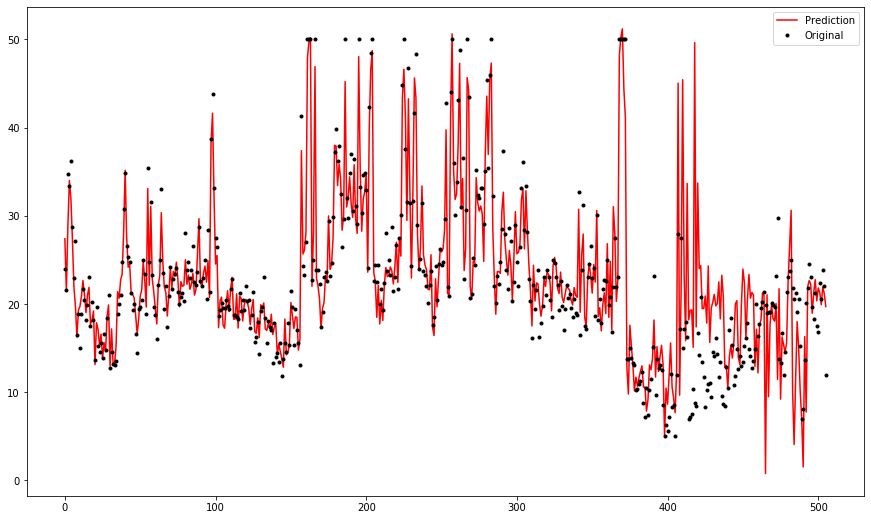

In [284]:
p3 = modelall.predict(inputsall)
plt.plot(p3, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

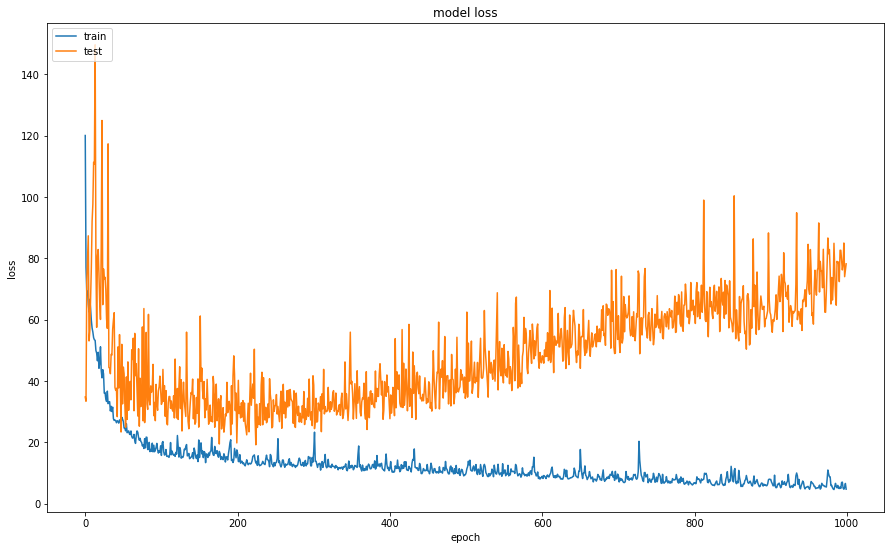

In [285]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### all Inputs whitening

In [286]:
inputsallscale = pd.DataFrame(pre.scale(inputsall), columns=inputsall.columns)
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputsallscale)
inputsallscale_white = pd.DataFrame(pca.transform(inputsallscale), columns=inputsallscale.columns)
history4 = modelall.fit(inputsallscale_white, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 44us/step - loss: 511.2507 - accuracy: 0.0000e+00 - mae: 20.4052 - val_loss: 153.5587 - val_accuracy: 0.0000e+00 - val_mae: 11.5130
Epoch 2/1000
404/404 [==============================] - 0s 37us/step - loss: 356.8275 - accuracy: 0.0000e+00 - mae: 15.6544 - val_loss: 52.4036 - val_accuracy: 0.0000e+00 - val_mae: 6.0042
Epoch 3/1000
404/404 [==============================] - 0s 39us/step - loss: 161.6188 - accuracy: 0.0025 - mae: 9.8494 - val_loss: 32.1006 - val_accuracy: 0.0000e+00 - val_mae: 4.4051
Epoch 4/1000
404/404 [==============================] - 0s 39us/step - loss: 69.7908 - accuracy: 0.0050 - mae: 6.5558 - val_loss: 31.3261 - val_accuracy: 0.0196 - val_mae: 4.3506
Epoch 5/1000
404/404 [==============================] - 0s 39us/step - loss: 32.0028 - accuracy: 0.0099 - mae: 4.3136 - val_loss: 24.7542 - val_accuracy: 0.0000e+00 - val_mae: 3.9524
Epoch 6/1000
404/404 [======

404/404 [==============================] - 0s 35us/step - loss: 7.3768 - accuracy: 0.0173 - mae: 1.9520 - val_loss: 27.3439 - val_accuracy: 0.0196 - val_mae: 4.0732
Epoch 47/1000
404/404 [==============================] - 0s 32us/step - loss: 7.3550 - accuracy: 0.0173 - mae: 1.9450 - val_loss: 28.1963 - val_accuracy: 0.0196 - val_mae: 4.1138
Epoch 48/1000
404/404 [==============================] - 0s 32us/step - loss: 7.1571 - accuracy: 0.0173 - mae: 1.9306 - val_loss: 27.8087 - val_accuracy: 0.0196 - val_mae: 4.1020
Epoch 49/1000
404/404 [==============================] - 0s 32us/step - loss: 7.0918 - accuracy: 0.0198 - mae: 1.9101 - val_loss: 27.8071 - val_accuracy: 0.0196 - val_mae: 4.0961
Epoch 50/1000
404/404 [==============================] - 0s 30us/step - loss: 7.0147 - accuracy: 0.0173 - mae: 1.9097 - val_loss: 28.3703 - val_accuracy: 0.0196 - val_mae: 4.1182
Epoch 51/1000
404/404 [==============================] - 0s 30us/step - loss: 6.9627 - accuracy: 0.0124 - mae: 1.9037 -

Epoch 92/1000
404/404 [==============================] - 0s 35us/step - loss: 5.0264 - accuracy: 0.0223 - mae: 1.6681 - val_loss: 35.1426 - val_accuracy: 0.0098 - val_mae: 4.3669
Epoch 93/1000
404/404 [==============================] - 0s 35us/step - loss: 4.9920 - accuracy: 0.0248 - mae: 1.6599 - val_loss: 35.0266 - val_accuracy: 0.0098 - val_mae: 4.3457
Epoch 94/1000
404/404 [==============================] - 0s 32us/step - loss: 4.9573 - accuracy: 0.0198 - mae: 1.6550 - val_loss: 35.1032 - val_accuracy: 0.0098 - val_mae: 4.3594
Epoch 95/1000
404/404 [==============================] - 0s 32us/step - loss: 4.9135 - accuracy: 0.0223 - mae: 1.6511 - val_loss: 35.4181 - val_accuracy: 0.0098 - val_mae: 4.3755
Epoch 96/1000
404/404 [==============================] - 0s 37us/step - loss: 4.9844 - accuracy: 0.0223 - mae: 1.6742 - val_loss: 34.1211 - val_accuracy: 0.0098 - val_mae: 4.3386
Epoch 97/1000
404/404 [==============================] - 0s 33us/step - loss: 4.8719 - accuracy: 0.0223 -

404/404 [==============================] - 0s 32us/step - loss: 3.9130 - accuracy: 0.0272 - mae: 1.4880 - val_loss: 41.2771 - val_accuracy: 0.0098 - val_mae: 4.6020
Epoch 138/1000
404/404 [==============================] - 0s 32us/step - loss: 3.9446 - accuracy: 0.0272 - mae: 1.5025 - val_loss: 42.0958 - val_accuracy: 0.0098 - val_mae: 4.6496
Epoch 139/1000
404/404 [==============================] - 0s 30us/step - loss: 3.9773 - accuracy: 0.0297 - mae: 1.4868 - val_loss: 41.3016 - val_accuracy: 0.0098 - val_mae: 4.6014
Epoch 140/1000
404/404 [==============================] - 0s 30us/step - loss: 3.9733 - accuracy: 0.0223 - mae: 1.5169 - val_loss: 41.8500 - val_accuracy: 0.0098 - val_mae: 4.6244
Epoch 141/1000
404/404 [==============================] - 0s 32us/step - loss: 3.8992 - accuracy: 0.0198 - mae: 1.4859 - val_loss: 41.5403 - val_accuracy: 0.0098 - val_mae: 4.6078
Epoch 142/1000
404/404 [==============================] - 0s 32us/step - loss: 3.8661 - accuracy: 0.0297 - mae: 1.4

404/404 [==============================] - 0s 32us/step - loss: 3.1864 - accuracy: 0.0272 - mae: 1.3510 - val_loss: 49.9114 - val_accuracy: 0.0098 - val_mae: 4.9429
Epoch 183/1000
404/404 [==============================] - 0s 30us/step - loss: 3.1892 - accuracy: 0.0248 - mae: 1.3496 - val_loss: 49.1441 - val_accuracy: 0.0098 - val_mae: 4.9194
Epoch 184/1000
404/404 [==============================] - 0s 27us/step - loss: 3.2083 - accuracy: 0.0272 - mae: 1.3528 - val_loss: 48.9989 - val_accuracy: 0.0098 - val_mae: 4.9257
Epoch 185/1000
404/404 [==============================] - 0s 30us/step - loss: 3.1717 - accuracy: 0.0272 - mae: 1.3474 - val_loss: 49.5222 - val_accuracy: 0.0098 - val_mae: 4.9449
Epoch 186/1000
404/404 [==============================] - 0s 30us/step - loss: 3.1500 - accuracy: 0.0297 - mae: 1.3405 - val_loss: 50.6214 - val_accuracy: 0.0098 - val_mae: 4.9868
Epoch 187/1000
404/404 [==============================] - 0s 37us/step - loss: 3.1585 - accuracy: 0.0297 - mae: 1.3

404/404 [==============================] - 0s 32us/step - loss: 2.7114 - accuracy: 0.0297 - mae: 1.2482 - val_loss: 59.2411 - val_accuracy: 0.0196 - val_mae: 5.3646
Epoch 228/1000
404/404 [==============================] - 0s 30us/step - loss: 2.6234 - accuracy: 0.0322 - mae: 1.2186 - val_loss: 58.9449 - val_accuracy: 0.0196 - val_mae: 5.3491
Epoch 229/1000
404/404 [==============================] - 0s 32us/step - loss: 2.6589 - accuracy: 0.0272 - mae: 1.2288 - val_loss: 57.4966 - val_accuracy: 0.0196 - val_mae: 5.2907
Epoch 230/1000
404/404 [==============================] - 0s 32us/step - loss: 2.6425 - accuracy: 0.0248 - mae: 1.2258 - val_loss: 59.6126 - val_accuracy: 0.0196 - val_mae: 5.3634
Epoch 231/1000
404/404 [==============================] - 0s 32us/step - loss: 2.6359 - accuracy: 0.0297 - mae: 1.2303 - val_loss: 59.4799 - val_accuracy: 0.0196 - val_mae: 5.3604
Epoch 232/1000
404/404 [==============================] - 0s 32us/step - loss: 2.5876 - accuracy: 0.0347 - mae: 1.2

404/404 [==============================] - 0s 35us/step - loss: 2.2081 - accuracy: 0.0272 - mae: 1.1103 - val_loss: 68.1232 - val_accuracy: 0.0098 - val_mae: 5.7276
Epoch 273/1000
404/404 [==============================] - 0s 35us/step - loss: 2.1869 - accuracy: 0.0371 - mae: 1.0976 - val_loss: 67.1422 - val_accuracy: 0.0098 - val_mae: 5.6931
Epoch 274/1000
404/404 [==============================] - 0s 32us/step - loss: 2.2089 - accuracy: 0.0396 - mae: 1.1086 - val_loss: 66.0980 - val_accuracy: 0.0098 - val_mae: 5.6648
Epoch 275/1000
404/404 [==============================] - 0s 31us/step - loss: 2.2304 - accuracy: 0.0371 - mae: 1.1036 - val_loss: 69.4859 - val_accuracy: 0.0098 - val_mae: 5.7895
Epoch 276/1000
404/404 [==============================] - 0s 30us/step - loss: 2.1670 - accuracy: 0.0272 - mae: 1.1050 - val_loss: 68.5468 - val_accuracy: 0.0098 - val_mae: 5.7481
Epoch 277/1000
404/404 [==============================] - 0s 30us/step - loss: 2.1650 - accuracy: 0.0322 - mae: 1.0

Epoch 317/1000
404/404 [==============================] - 0s 31us/step - loss: 1.9150 - accuracy: 0.0347 - mae: 1.0458 - val_loss: 76.3453 - val_accuracy: 0.0000e+00 - val_mae: 6.1178
Epoch 318/1000
404/404 [==============================] - 0s 35us/step - loss: 1.8966 - accuracy: 0.0371 - mae: 1.0238 - val_loss: 73.9128 - val_accuracy: 0.0000e+00 - val_mae: 6.0301
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 1.9492 - accuracy: 0.0272 - mae: 1.0431 - val_loss: 77.2405 - val_accuracy: 0.0000e+00 - val_mae: 6.1424
Epoch 320/1000
404/404 [==============================] - 0s 32us/step - loss: 1.9362 - accuracy: 0.0347 - mae: 1.0248 - val_loss: 78.7185 - val_accuracy: 0.0000e+00 - val_mae: 6.1923
Epoch 321/1000
404/404 [==============================] - 0s 32us/step - loss: 1.8700 - accuracy: 0.0396 - mae: 1.0070 - val_loss: 77.1002 - val_accuracy: 0.0000e+00 - val_mae: 6.1375
Epoch 322/1000
404/404 [==============================] - 0s 35us/step - loss: 1

404/404 [==============================] - 0s 35us/step - loss: 1.6179 - accuracy: 0.0495 - mae: 0.9421 - val_loss: 85.1122 - val_accuracy: 0.0000e+00 - val_mae: 6.4885
Epoch 362/1000
404/404 [==============================] - 0s 39us/step - loss: 1.6086 - accuracy: 0.0421 - mae: 0.9347 - val_loss: 83.4869 - val_accuracy: 0.0000e+00 - val_mae: 6.4307
Epoch 363/1000
404/404 [==============================] - 0s 32us/step - loss: 1.6015 - accuracy: 0.0446 - mae: 0.9309 - val_loss: 83.2984 - val_accuracy: 0.0000e+00 - val_mae: 6.4276
Epoch 364/1000
404/404 [==============================] - 0s 32us/step - loss: 1.6124 - accuracy: 0.0421 - mae: 0.9361 - val_loss: 86.9345 - val_accuracy: 0.0000e+00 - val_mae: 6.5454
Epoch 365/1000
404/404 [==============================] - 0s 35us/step - loss: 1.5955 - accuracy: 0.0446 - mae: 0.9316 - val_loss: 86.1115 - val_accuracy: 0.0000e+00 - val_mae: 6.5244
Epoch 366/1000
404/404 [==============================] - 0s 37us/step - loss: 1.6031 - accurac

404/404 [==============================] - 0s 30us/step - loss: 1.4380 - accuracy: 0.0520 - mae: 0.8735 - val_loss: 93.9094 - val_accuracy: 0.0000e+00 - val_mae: 6.8597
Epoch 406/1000
404/404 [==============================] - 0s 30us/step - loss: 1.4357 - accuracy: 0.0619 - mae: 0.8850 - val_loss: 89.7704 - val_accuracy: 0.0000e+00 - val_mae: 6.7231
Epoch 407/1000
404/404 [==============================] - 0s 32us/step - loss: 1.4907 - accuracy: 0.0594 - mae: 0.8868 - val_loss: 91.6083 - val_accuracy: 0.0000e+00 - val_mae: 6.7881
Epoch 408/1000
404/404 [==============================] - 0s 32us/step - loss: 1.4264 - accuracy: 0.0545 - mae: 0.8715 - val_loss: 90.1718 - val_accuracy: 0.0000e+00 - val_mae: 6.7380
Epoch 409/1000
404/404 [==============================] - 0s 32us/step - loss: 1.4046 - accuracy: 0.0668 - mae: 0.8705 - val_loss: 91.6318 - val_accuracy: 0.0098 - val_mae: 6.7825
Epoch 410/1000
404/404 [==============================] - 0s 35us/step - loss: 1.3954 - accuracy: 0

404/404 [==============================] - 0s 35us/step - loss: 1.2404 - accuracy: 0.0693 - mae: 0.8092 - val_loss: 98.0408 - val_accuracy: 0.0098 - val_mae: 7.0310
Epoch 451/1000
404/404 [==============================] - 0s 35us/step - loss: 1.2399 - accuracy: 0.0668 - mae: 0.8079 - val_loss: 98.1781 - val_accuracy: 0.0098 - val_mae: 7.0418
Epoch 452/1000
404/404 [==============================] - 0s 35us/step - loss: 1.2599 - accuracy: 0.0619 - mae: 0.8128 - val_loss: 100.3827 - val_accuracy: 0.0098 - val_mae: 7.1117
Epoch 453/1000
404/404 [==============================] - 0s 32us/step - loss: 1.2098 - accuracy: 0.0693 - mae: 0.7988 - val_loss: 101.2368 - val_accuracy: 0.0098 - val_mae: 7.1409
Epoch 454/1000
404/404 [==============================] - 0s 35us/step - loss: 1.2056 - accuracy: 0.0644 - mae: 0.8023 - val_loss: 95.0494 - val_accuracy: 0.0000e+00 - val_mae: 6.9401
Epoch 455/1000
404/404 [==============================] - 0s 32us/step - loss: 1.2284 - accuracy: 0.0644 - ma

404/404 [==============================] - 0s 30us/step - loss: 1.1007 - accuracy: 0.0767 - mae: 0.7666 - val_loss: 102.7253 - val_accuracy: 0.0098 - val_mae: 7.2122
Epoch 496/1000
404/404 [==============================] - 0s 32us/step - loss: 1.1825 - accuracy: 0.0693 - mae: 0.8004 - val_loss: 103.8714 - val_accuracy: 0.0098 - val_mae: 7.2468
Epoch 497/1000
404/404 [==============================] - 0s 32us/step - loss: 1.2083 - accuracy: 0.0644 - mae: 0.8106 - val_loss: 107.7641 - val_accuracy: 0.0098 - val_mae: 7.3691
Epoch 498/1000
404/404 [==============================] - 0s 35us/step - loss: 1.0893 - accuracy: 0.0767 - mae: 0.7535 - val_loss: 105.7666 - val_accuracy: 0.0098 - val_mae: 7.3044
Epoch 499/1000
404/404 [==============================] - 0s 37us/step - loss: 1.0481 - accuracy: 0.0767 - mae: 0.7355 - val_loss: 106.8679 - val_accuracy: 0.0098 - val_mae: 7.3428
Epoch 500/1000
404/404 [==============================] - 0s 37us/step - loss: 1.0361 - accuracy: 0.0792 - mae

404/404 [==============================] - 0s 32us/step - loss: 0.9843 - accuracy: 0.0693 - mae: 0.7204 - val_loss: 109.2608 - val_accuracy: 0.0098 - val_mae: 7.4322
Epoch 541/1000
404/404 [==============================] - 0s 32us/step - loss: 0.9818 - accuracy: 0.0842 - mae: 0.7192 - val_loss: 107.5840 - val_accuracy: 0.0098 - val_mae: 7.3779
Epoch 542/1000
404/404 [==============================] - 0s 37us/step - loss: 0.9822 - accuracy: 0.0743 - mae: 0.7095 - val_loss: 111.9846 - val_accuracy: 0.0098 - val_mae: 7.5186
Epoch 543/1000
404/404 [==============================] - 0s 32us/step - loss: 1.0078 - accuracy: 0.0693 - mae: 0.7314 - val_loss: 112.0489 - val_accuracy: 0.0098 - val_mae: 7.5244
Epoch 544/1000
404/404 [==============================] - 0s 32us/step - loss: 0.9844 - accuracy: 0.0743 - mae: 0.7170 - val_loss: 115.0137 - val_accuracy: 0.0000e+00 - val_mae: 7.6068
Epoch 545/1000
404/404 [==============================] - 0s 35us/step - loss: 0.9193 - accuracy: 0.0842 -

404/404 [==============================] - 0s 32us/step - loss: 0.8264 - accuracy: 0.0866 - mae: 0.6544 - val_loss: 108.8379 - val_accuracy: 0.0196 - val_mae: 7.4331
Epoch 586/1000
404/404 [==============================] - 0s 30us/step - loss: 0.8461 - accuracy: 0.0941 - mae: 0.6552 - val_loss: 111.4870 - val_accuracy: 0.0196 - val_mae: 7.5129
Epoch 587/1000
404/404 [==============================] - 0s 30us/step - loss: 0.8275 - accuracy: 0.0842 - mae: 0.6343 - val_loss: 112.1520 - val_accuracy: 0.0000e+00 - val_mae: 7.5368
Epoch 588/1000
404/404 [==============================] - 0s 40us/step - loss: 0.8124 - accuracy: 0.0767 - mae: 0.6434 - val_loss: 112.2843 - val_accuracy: 0.0098 - val_mae: 7.5439
Epoch 589/1000
404/404 [==============================] - 0s 49us/step - loss: 0.8376 - accuracy: 0.0817 - mae: 0.6599 - val_loss: 112.2282 - val_accuracy: 0.0098 - val_mae: 7.5419
Epoch 590/1000
404/404 [==============================] - 0s 37us/step - loss: 0.8023 - accuracy: 0.0866 -

404/404 [==============================] - 0s 32us/step - loss: 0.7273 - accuracy: 0.0891 - mae: 0.6042 - val_loss: 115.0432 - val_accuracy: 0.0098 - val_mae: 7.6290
Epoch 630/1000
404/404 [==============================] - 0s 32us/step - loss: 0.7234 - accuracy: 0.1015 - mae: 0.5959 - val_loss: 114.0730 - val_accuracy: 0.0098 - val_mae: 7.5962
Epoch 631/1000
404/404 [==============================] - 0s 35us/step - loss: 0.7292 - accuracy: 0.0817 - mae: 0.6040 - val_loss: 115.4052 - val_accuracy: 0.0098 - val_mae: 7.6353
Epoch 632/1000
404/404 [==============================] - 0s 35us/step - loss: 0.6958 - accuracy: 0.0941 - mae: 0.5871 - val_loss: 118.0262 - val_accuracy: 0.0000e+00 - val_mae: 7.7286
Epoch 633/1000
404/404 [==============================] - 0s 37us/step - loss: 0.7540 - accuracy: 0.0916 - mae: 0.6135 - val_loss: 111.5898 - val_accuracy: 0.0098 - val_mae: 7.5217
Epoch 634/1000
404/404 [==============================] - 0s 32us/step - loss: 0.6835 - accuracy: 0.0941 -

404/404 [==============================] - 0s 35us/step - loss: 0.6490 - accuracy: 0.0965 - mae: 0.5557 - val_loss: 117.4854 - val_accuracy: 0.0098 - val_mae: 7.7299
Epoch 675/1000
404/404 [==============================] - 0s 37us/step - loss: 0.6512 - accuracy: 0.0916 - mae: 0.5663 - val_loss: 113.7262 - val_accuracy: 0.0098 - val_mae: 7.5994
Epoch 676/1000
404/404 [==============================] - 0s 33us/step - loss: 0.6275 - accuracy: 0.0891 - mae: 0.5496 - val_loss: 119.7863 - val_accuracy: 0.0000e+00 - val_mae: 7.7820
Epoch 677/1000
404/404 [==============================] - 0s 40us/step - loss: 0.6583 - accuracy: 0.0916 - mae: 0.5679 - val_loss: 114.2349 - val_accuracy: 0.0098 - val_mae: 7.6266
Epoch 678/1000
404/404 [==============================] - 0s 39us/step - loss: 0.6998 - accuracy: 0.0792 - mae: 0.5897 - val_loss: 121.6247 - val_accuracy: 0.0000e+00 - val_mae: 7.8410
Epoch 679/1000
404/404 [==============================] - 0s 32us/step - loss: 0.7265 - accuracy: 0.08

Epoch 719/1000
404/404 [==============================] - 0s 32us/step - loss: 0.5992 - accuracy: 0.1040 - mae: 0.5236 - val_loss: 117.6039 - val_accuracy: 0.0000e+00 - val_mae: 7.7277
Epoch 720/1000
404/404 [==============================] - 0s 37us/step - loss: 0.5939 - accuracy: 0.1015 - mae: 0.5260 - val_loss: 113.0493 - val_accuracy: 0.0098 - val_mae: 7.5807
Epoch 721/1000
404/404 [==============================] - 0s 37us/step - loss: 0.7008 - accuracy: 0.0990 - mae: 0.5950 - val_loss: 113.8431 - val_accuracy: 0.0000e+00 - val_mae: 7.5970
Epoch 722/1000
404/404 [==============================] - 0s 35us/step - loss: 0.6127 - accuracy: 0.0817 - mae: 0.5485 - val_loss: 117.5547 - val_accuracy: 0.0098 - val_mae: 7.7169
Epoch 723/1000
404/404 [==============================] - 0s 37us/step - loss: 0.5715 - accuracy: 0.1089 - mae: 0.5205 - val_loss: 117.3677 - val_accuracy: 0.0000e+00 - val_mae: 7.7194
Epoch 724/1000
404/404 [==============================] - 0s 35us/step - loss: 0.57

404/404 [==============================] - 0s 35us/step - loss: 0.5305 - accuracy: 0.0965 - mae: 0.4984 - val_loss: 117.6622 - val_accuracy: 0.0000e+00 - val_mae: 7.7276
Epoch 764/1000
404/404 [==============================] - 0s 35us/step - loss: 0.5518 - accuracy: 0.1114 - mae: 0.5099 - val_loss: 115.8867 - val_accuracy: 0.0098 - val_mae: 7.6591
Epoch 765/1000
404/404 [==============================] - 0s 37us/step - loss: 0.5671 - accuracy: 0.0941 - mae: 0.5382 - val_loss: 110.9421 - val_accuracy: 0.0098 - val_mae: 7.5296
Epoch 766/1000
404/404 [==============================] - 0s 32us/step - loss: 0.6040 - accuracy: 0.0842 - mae: 0.5587 - val_loss: 114.6880 - val_accuracy: 0.0098 - val_mae: 7.6329
Epoch 767/1000
404/404 [==============================] - 0s 30us/step - loss: 0.5151 - accuracy: 0.0891 - mae: 0.5146 - val_loss: 116.4345 - val_accuracy: 0.0098 - val_mae: 7.6909
Epoch 768/1000
404/404 [==============================] - 0s 35us/step - loss: 0.5138 - accuracy: 0.1114 -

Epoch 808/1000
404/404 [==============================] - 0s 35us/step - loss: 0.4684 - accuracy: 0.0990 - mae: 0.4653 - val_loss: 118.0519 - val_accuracy: 0.0196 - val_mae: 7.7471
Epoch 809/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4816 - accuracy: 0.0990 - mae: 0.4807 - val_loss: 117.8030 - val_accuracy: 0.0196 - val_mae: 7.7401
Epoch 810/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4685 - accuracy: 0.0990 - mae: 0.4715 - val_loss: 122.2462 - val_accuracy: 0.0098 - val_mae: 7.8836
Epoch 811/1000
404/404 [==============================] - 0s 37us/step - loss: 0.4702 - accuracy: 0.1114 - mae: 0.4614 - val_loss: 118.5484 - val_accuracy: 0.0098 - val_mae: 7.7609
Epoch 812/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4490 - accuracy: 0.0990 - mae: 0.4572 - val_loss: 119.3316 - val_accuracy: 0.0196 - val_mae: 7.7899
Epoch 813/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4788 - accurac

404/404 [==============================] - 0s 32us/step - loss: 0.4999 - accuracy: 0.1089 - mae: 0.4753 - val_loss: 114.8959 - val_accuracy: 0.0196 - val_mae: 7.6529
Epoch 854/1000
404/404 [==============================] - 0s 40us/step - loss: 0.5407 - accuracy: 0.0817 - mae: 0.5263 - val_loss: 118.3552 - val_accuracy: 0.0196 - val_mae: 7.7483
Epoch 855/1000
404/404 [==============================] - 0s 30us/step - loss: 0.4553 - accuracy: 0.1040 - mae: 0.4678 - val_loss: 120.0706 - val_accuracy: 0.0196 - val_mae: 7.8187
Epoch 856/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4694 - accuracy: 0.1040 - mae: 0.4827 - val_loss: 121.8842 - val_accuracy: 0.0196 - val_mae: 7.8440
Epoch 857/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4211 - accuracy: 0.0941 - mae: 0.4541 - val_loss: 120.5163 - val_accuracy: 0.0196 - val_mae: 7.8204
Epoch 858/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4175 - accuracy: 0.1015 - mae

404/404 [==============================] - 0s 35us/step - loss: 0.4064 - accuracy: 0.1139 - mae: 0.4329 - val_loss: 121.3467 - val_accuracy: 0.0196 - val_mae: 7.8365
Epoch 899/1000
404/404 [==============================] - 0s 30us/step - loss: 0.3692 - accuracy: 0.1238 - mae: 0.4011 - val_loss: 124.2306 - val_accuracy: 0.0196 - val_mae: 7.9186
Epoch 900/1000
404/404 [==============================] - 0s 35us/step - loss: 0.3445 - accuracy: 0.1213 - mae: 0.3911 - val_loss: 120.4312 - val_accuracy: 0.0196 - val_mae: 7.8051
Epoch 901/1000
404/404 [==============================] - 0s 37us/step - loss: 0.3727 - accuracy: 0.1114 - mae: 0.4061 - val_loss: 120.6522 - val_accuracy: 0.0196 - val_mae: 7.8086
Epoch 902/1000
404/404 [==============================] - 0s 39us/step - loss: 0.3874 - accuracy: 0.1089 - mae: 0.4194 - val_loss: 125.9785 - val_accuracy: 0.0196 - val_mae: 7.9698
Epoch 903/1000
404/404 [==============================] - 0s 35us/step - loss: 0.3779 - accuracy: 0.1188 - mae

404/404 [==============================] - 0s 32us/step - loss: 0.3382 - accuracy: 0.1163 - mae: 0.3864 - val_loss: 123.6323 - val_accuracy: 0.0294 - val_mae: 7.9087
Epoch 944/1000
404/404 [==============================] - 0s 30us/step - loss: 0.3240 - accuracy: 0.1188 - mae: 0.3839 - val_loss: 122.1798 - val_accuracy: 0.0294 - val_mae: 7.8382
Epoch 945/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3775 - accuracy: 0.1064 - mae: 0.4032 - val_loss: 125.0398 - val_accuracy: 0.0294 - val_mae: 7.9376
Epoch 946/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3197 - accuracy: 0.1213 - mae: 0.3725 - val_loss: 125.0348 - val_accuracy: 0.0294 - val_mae: 7.9166
Epoch 947/1000
404/404 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.1333 - mae: 0.33 - 0s 32us/step - loss: 0.3348 - accuracy: 0.1213 - mae: 0.3922 - val_loss: 125.1998 - val_accuracy: 0.0294 - val_mae: 7.9510
Epoch 948/1000
404/404 [==============================

404/404 [==============================] - 0s 32us/step - loss: 0.3529 - accuracy: 0.0990 - mae: 0.4221 - val_loss: 125.8306 - val_accuracy: 0.0196 - val_mae: 7.9462
Epoch 989/1000
404/404 [==============================] - 0s 31us/step - loss: 0.3119 - accuracy: 0.1114 - mae: 0.3848 - val_loss: 126.2691 - val_accuracy: 0.0196 - val_mae: 7.9614
Epoch 990/1000
404/404 [==============================] - 0s 30us/step - loss: 0.2966 - accuracy: 0.1213 - mae: 0.3552 - val_loss: 126.1895 - val_accuracy: 0.0294 - val_mae: 7.9474
Epoch 991/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2802 - accuracy: 0.1262 - mae: 0.3527 - val_loss: 125.3552 - val_accuracy: 0.0196 - val_mae: 7.9271
Epoch 992/1000
404/404 [==============================] - 0s 44us/step - loss: 0.3233 - accuracy: 0.1139 - mae: 0.3852 - val_loss: 129.4227 - val_accuracy: 0.0196 - val_mae: 8.0532
Epoch 993/1000
404/404 [==============================] - 0s 52us/step - loss: 0.3377 - accuracy: 0.1040 - mae

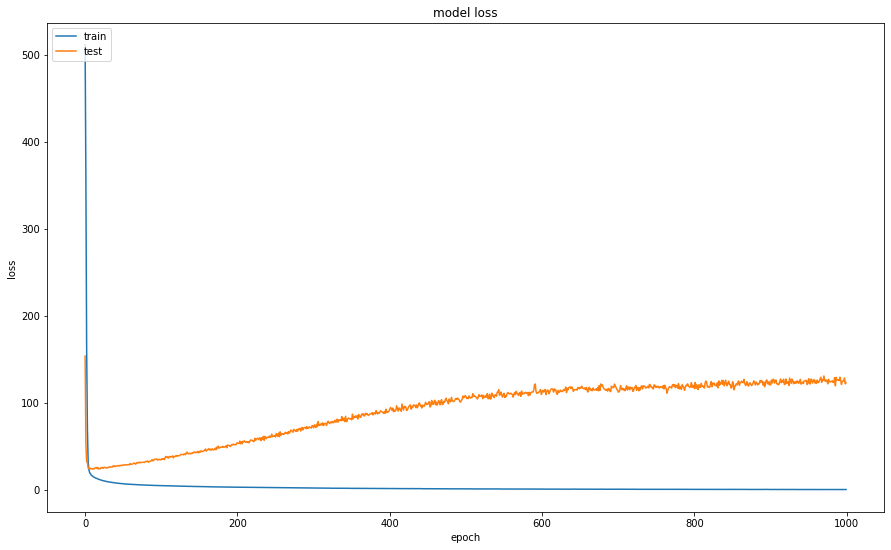

In [287]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

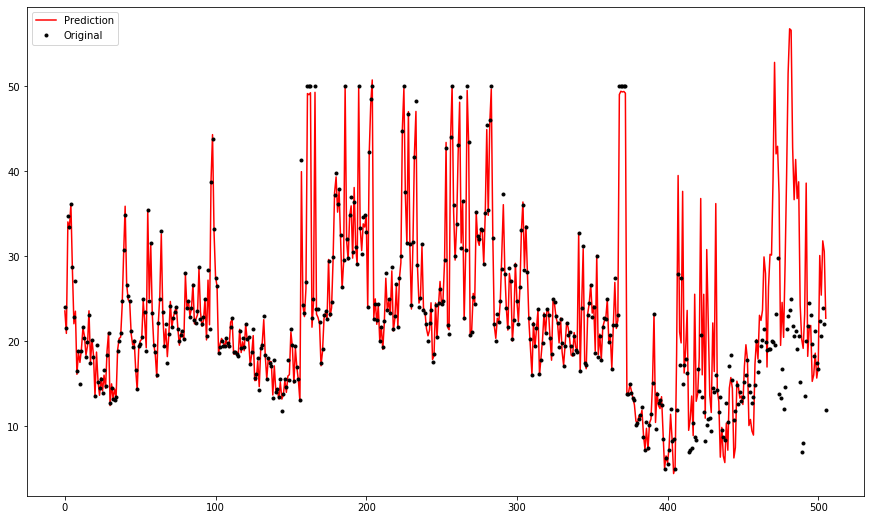

In [288]:
p4 = modelall.predict(inputsallscale_white)
plt.plot(p4, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

## Prediction review

We can use the loss function to calculate how well the prediction fits the data it's trained on. This loss calculation is based on the difference between predicted and actual values. The larger the number, the further the predicted values are from the actual values[3]. 

In our first scenario, six inputs were selected. These were selected based on ttest results picking what I thought were the variables most likely to impact MEDV. 2nd scenario invloved the same 6 inputs but the data was preprocessed and whitened. 
The 3rd and 4th scenarios were basically the same except it included all 13 variables. The loss values (at the end of the run cycle) for these are as follows.

<table>
    <tr>
        <th>
            Scenario
        </th>
        <th>
            Loss Result
        </th>
    </tr>
    <tr>
        <td>
            6 Inputs - No Preprocessing/Whitening
        </td>
        <td>
            6.2
        </td>
    </tr>
    <tr>
        <td>
            6 Inputs - Preprocessing/Whitening
        </td>
        <td>
            3.5
        </td>
    </tr>
    <tr>
        <td>
            All Inputs - No Preprocessing/Whitening
        </td>
        <td>
            8.1
        </td>
    </tr>
    <tr>
        <td>
            All Inputs - Preprocessing/Whitening
        </td>
        <td>
            0.3
        </td>
</tr>
</table>

It may be useful to visualise two of the different prediction models overlayed.

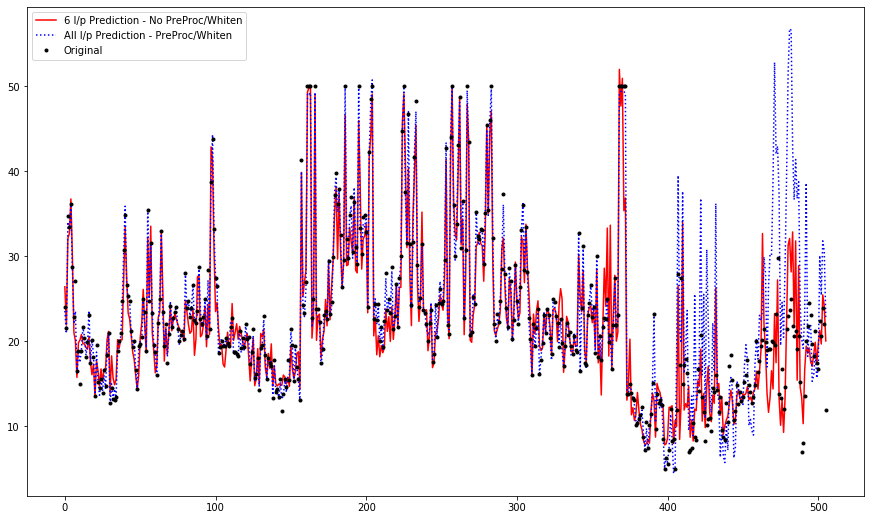

In [289]:
plt.plot(p, 'r-', label='6 I/p Prediction - No PreProc/Whiten')
plt.plot(p4, 'b:', label='All I/p Prediction - PreProc/Whiten')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

What is interesting here is that the prediction with all of the inputs pre processed and whitened started off very accurate and toward the end seemed to increase in error. Overall it was more accurate compared to the initial 6 input trial where there was no whitening/pre processing but it interesting that towards the end it varied a lot. 

## References

[1] - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[2] - https://scikit-learn.org/stable/modules/preprocessing.html

[3] - https://heartbeat.fritz.ai/how-to-create-a-custom-loss-function-in-keras-637bd312e9ab